# Векторный потенциал прецессирующего магнитного диполя

Предыстория вопроса состоит в том, что в работе 

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Vector_potential_of_the_electrostatic_field_of_a_point_charge.ipynb

мне удалось записать векторный потенциал для кулоновского поля точечного электрического заряда. Таким образом формула для векторного потенциала кулоновского заряда получена и проверка показала, что операция ротора примененная к этому векторнному потенциалу дает кулоновское электрическое поле точечного заряда.

Полученный векторный потенциал по своей форме весьма интересный. Его вид как будто показал, что существование электростатического заряда не возможно без выделенной оси вращения.

Поэтому в настоящей работе я задаюсь следующим вопросом: может ли векторный потенциал кулоновского поля электрона создаваться, например, с помощью прецессии дипольного момента магнетона Бора?

Таким образом я рассматриваю далее следующую задачу: имеется магнитный диполь с двумя противоположно заряженными магнитными полюсами, который прецессирует вокруг оси проходящей через центр магнитного диполя. Более наглядно моделируемая в данной работе структура нарисована здесь

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Structure_of_electron.ipynb


Таким образом создаётся симметричная пара кольцевых магнитных токов, которые текут во взаимно противоположных направлениях (потому как движение по окружности в одном и том же направлении, например по часовой стрелке, пары магнитных зарядов, имеющих противоположные знаки создает пару взаимно противоположных по направлению кольцевых магнитных токов).

Для решения этой задачи в литературе был найден алгоритм расчета векторного потенциала для кольцевого тока, который сводится к эллиптическим интегралам. Таким образом трехмерное интегрирование сводится к двумерному.

Однако работа в цилиндрической системе координат для целей настоящей работы оказалась неудобной. Потому что в цилиндрических координатах интегральное уравнение Фредгольма первого рода не удалось привести к интегральному уравнению Фредгольма второго рода.

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Vector_potential_of_a_precessing_magnetic_dipole.ipynb

Поэтому в данной работе решается задача расчёта векторного потенциала кольцевого тока в сферической системе координат с последующим решением интегрального уравнения Фредгольма.

Поскольку я рассматриваю не точечный магнитный заряд в составе прецессирующего диполя магнетона Бора, а распределенный в пространстве магнитный заряд, то в подынтегральном выражении моего интегрального уравнения есть два множителя: неизвестная функция плотности распределения магнитных токов в пространстве и так называемое ядро (или оператор) моего интегрального уравнения.

Интегральное уравнение решается методом итераций. Из-за вычислительных сложностей многоитерационного интегирования в данной работе представлен результат лишь нулевого приближения неизвестной функции распределения магнитных токов прецессирующего магнетона Бора в пространстве.

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))
    
def displ(tex):
    display(Math(tex))

In [2]:
theta_m = var("theta_m")
theta_a = var("theta_a")
#assume (theta_a, "real")
r_m = var("r_m")
r_a = var("r_a")

assume(r_m>0)
assume(r_a>0)

In [3]:
from sage.functions.special import spherical_harmonic
from sage.symbolic.integration.integral import definite_integral
from sage.calculus.calculus import symbolic_sum

l, m = var("l, m")
theta_m, phi_m = var ("theta_m, phi_m")
theta_a, phi_a = var ("theta_a, phi_a")
disp(integrate(spherical_harmonic(l, m, theta_m, phi_m)*cos(phi_m), phi_m, 0, 2*pi, algorithm="sympy"))

<IPython.core.display.Math object>

In [4]:
def sympy_sum(expression, v, a, b):
    try:
        expression,v,a,b = [expr._sympy_() for expr in (expression, v, a, b)]
    except Exception as ex:
        #print("warning:", str(ex))
        pass
    from sympy import summation
    from sage.interfaces.sympy import sympy_init
    sympy_init()
    result = summation(expression, (v, a, b))
    
    try:
        return result._sage_()
    except AttributeError:
        #print(result)
        return result
        #raise AttributeError("Unable to convert SymPy result (={}) into"
        #        " Sage".format(result))
    except NotImplementedError as err:
        #print(result)
        return result
        #raise err

З.Флюгге Задачи по квантовой механике, том 2, стр. 299 формула (24)

In [5]:
def legendre_sum_A_ring_int_phi_q_hold(l, theta_m, theta_a, hold=True):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_m, theta_a : \
        integrate(spherical_harmonic(l, m, theta_m, phi_m)*cos(phi_m), phi_m, 0, 2*pi, hold=hold) \
                  * conjugate(spherical_harmonic(l, m, theta_a, 0))
    return 4 * pi / (2*l + 1) * symbolic_sum(f(l, m, theta_m, theta_a), m, -l, l, hold=hold)

def legendre_sum_A_ring_hold(l, theta_m, theta_a, hold=True):
    return legendre_sum_A_ring_int_phi_q_hold(l, theta_m, theta_a, hold=hold)

In [6]:
def legendre_sum_A_ring_int_phi_a_hold(l, theta_m, theta_a, hold=True):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_m, theta_a : \
        spherical_harmonic(l, m, theta_m, 0) \
                  * conjugate(integrate(spherical_harmonic(l, m, theta_a, phi_a)*cos(phi_a), phi_a, 0, 2*pi, hold=hold))
    return 4 * pi / (2*l + 1) * symbolic_sum(f(l, m, theta_m, theta_a), m, -l, l, hold=hold)

In [7]:
def legendre_sum_A_ring_int_phi_a(l, theta_m, theta_a):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_m, theta_a : \
        spherical_harmonic(l, m, theta_m, 0) \
                  * conjugate( \
                        cases(((m == -1, -pi*spherical_harmonic(l, 1, theta_a, 2*pi)), \
                               (m == 1, pi*spherical_harmonic(l, 1, theta_a, 2*pi)), \
                               (1, I*m*spherical_harmonic(l, m, theta_a, 0)/(m^2 - 1) \
                                 - I*m*spherical_harmonic(l, m, theta_a, 2*pi)/(m^2 - 1)))) \
                             )
    return 4 * pi / (2*l + 1) * symbolic_sum(f(l, m, theta_m, theta_a), m, -l, l, hold=True)

In [8]:
def legendre_sum_A_ring_int_phi_a_sympy(l, theta_m, theta_a):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_m, theta_a : \
        spherical_harmonic(l, m, theta_m, 0) \
                  * conjugate( \
                        cases(((m == -1, -pi*spherical_harmonic(l, 1, theta_a, 2*pi)), \
                               (m == 1, pi*spherical_harmonic(l, 1, theta_a, 2*pi)), \
                               (1, I*m*spherical_harmonic(l, m, theta_a, 0)/(m^2 - 1) \
                                 - I*m*spherical_harmonic(l, m, theta_a, 2*pi)/(m^2 - 1)))) \
                             )
    return 4 * pi / (2*l + 1) * sympy_sum(f(l, m, theta_m, theta_a), m, -l, l)

In [9]:
def legendre_sum_A_ring_int_phi_a_sympy_diff_theta_a(l, theta_m, theta_a):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_m, theta_a : \
        spherical_harmonic(l, m, theta_m, 0) \
                  * conjugate( \
                        cases(((m == -1, -pi*spherical_harmonic(l, 1, theta_a, 2*pi).diff(theta_a)), \
                               (m == 1, pi*spherical_harmonic(l, 1, theta_a, 2*pi).diff(theta_a)), \
                               (1, I*m*spherical_harmonic(l, m, theta_a, 0).diff(theta_a)/(m^2 - 1) \
                                 - I*m*spherical_harmonic(l, m, theta_a, 2*pi).diff(theta_a)/(m^2 - 1)))) \
                             )
    return 4 * pi / (2*l + 1) * sympy_sum(f(l, m, theta_m, theta_a), m, -l, l)

In [12]:
def legendre_sum_A_ring(l, theta_m, theta_a):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_m, theta_a : \
        cases(((m == -1, -pi*spherical_harmonic(l, 1, theta_m, 2*pi)), \
               (m == 1, pi*spherical_harmonic(l, 1, theta_m, 2*pi)), \
               (1, I*m*spherical_harmonic(l, m, theta_m, 0)/(m^2 - 1) \
                 - I*m*spherical_harmonic(l, m, theta_m, 2*pi)/(m^2 - 1)))) \
                  * conjugate(spherical_harmonic(l, m, theta_a, 0))
    return 4 * pi / (2*l + 1) * symbolic_sum(f(l, m, theta_m, theta_a), m, -l, l)

In [13]:
def legendre_sum_A_ring_sympy(l, theta_m, theta_a):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_m, theta_a : \
        cases(((m == -1, -pi*spherical_harmonic(l, 1, theta_m, 2*pi)), \
               (m == 1, pi*spherical_harmonic(l, 1, theta_m, 2*pi)), \
               (1, I*m*spherical_harmonic(l, m, theta_m, 0)/(m^2 - 1) \
                 - I*m*spherical_harmonic(l, m, theta_m, 2*pi)/(m^2 - 1)))) \
                  * conjugate(spherical_harmonic(l, m, theta_a, 0))

    return 4 * pi / (2*l + 1) * sympy_sum(f(l, m, theta_m, theta_a), m, -l, l)

In [14]:
def legendre_sum_A_ring_sympy_diff_theta_a(l, theta_m, theta_a):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_m, theta_a : \
        cases(((m == -1, -pi*spherical_harmonic(l, 1, theta_m, 2*pi)), \
               (m == 1, pi*spherical_harmonic(l, 1, theta_m, 2*pi)), \
               (1, I*m*spherical_harmonic(l, m, theta_m, 0)/(m^2 - 1) \
                 - I*m*spherical_harmonic(l, m, theta_m, 2*pi)/(m^2 - 1)))) \
                  * conjugate(spherical_harmonic(l, m, theta_a, 0).diff(theta_a))

    return 4 * pi / (2*l + 1) * sympy_sum(f(l, m, theta_m, theta_a), m, -l, l)

если $\left( {{r}_{q}}<{{r}_{a}} \right)$ то

$A_{\varphi} = \frac{\mu \, I}{4 \pi}\,r_q \, sin \theta_q \,\frac{1}{{{r}_{a}}}\sum\limits_{l=0}^{\infty }{{{\left( \frac{{{r}_{q}}}{{{r}_{a}}} \right)}^{l}}{\frac{4\pi }{2l+1}\sum\limits_{m=-l}^{l}{Y_{l,m}^{*}\left( {{\theta }_{a}},{{\varphi }_{a}} \right)}\, \int\limits_{\varphi_q}^{} cos\,{\varphi_q } \, {{Y}_{l,m}}\left( {{\theta }_{q}},{{\varphi }_{q}} \right)}} \, d \varphi_q$

и если $\left( {{r}_{a}}<{{r}_{q}} \right)$ то

$A_{\varphi} = \frac{\mu \, I}{4 \pi}\,r_q \, sin \theta_q \, \frac{1}{{{r}_{q}}}\sum\limits_{l=0}^{\infty }{{{\left( \frac{{{r}_{a}}}{{{r}_{q}}} \right)}^{l}}{\frac{4\pi }{2l+1}\sum\limits_{m=-l}^{l}{Y_{l,m}^{*}\left( {{\theta }_{a}},{{\varphi }_{a}} \right)}\,\int\limits_{\varphi_q}^{} cos\,{\varphi_q } \, {{Y}_{l,m}}\left( {{\theta }_{q}},{{\varphi }_{q}} \right)}} \, d \varphi_q$

In [15]:
def a_ring_rq_less_than_ra(l, r_m, theta_m, r_a, theta_a):
    #if r_m < r_a:
    return r_m * sin(theta_m) * ((1/r_a)*((r_m/r_a)^l)*legendre_sum_A_ring(l, theta_m, theta_a))
def a_ring_ra_less_than_rq(l, r_m, theta_m, r_a, theta_a):
    # if r_a < r_m
    return r_m * sin(theta_m) * ((1/r_m)*((r_a/r_m)^l)*legendre_sum_A_ring(l, theta_m, theta_a))

In [16]:
def a_ring_rq_less_than_ra_sympy(l, r_m, theta_m, r_a, theta_a):
    #if r_m < r_a:
    return r_m * sin(theta_m) * ((1/r_a)*((r_m/r_a)^l)*legendre_sum_A_ring_sympy(l, theta_m, theta_a))
def a_ring_ra_less_than_rq_sympy(l, r_m, theta_m, r_a, theta_a):
    # if r_a < r_m
    return r_m * sin(theta_m) * ((1/r_m)*((r_a/r_m)^l)*legendre_sum_A_ring_sympy(l, theta_m, theta_a))

In [17]:
def a_ring(l, r_m, theta_m, r_a, theta_a):
    if r_m < r_a:
        return a_ring_rq_less_than_ra(l, r_m, theta_m, r_a, theta_a)
    else:
        # if r_a < r_m
        return a_ring_ra_less_than_rq(l, r_m, theta_m, r_a, theta_a)

In [18]:
def a_ring_sympy(l, r_m, theta_m, r_a, theta_a):
    if r_m < r_a:
        return a_ring_rq_less_than_ra_sympy(l, r_m, theta_m, r_a, theta_a)
    else:
        # if r_a < r_m
        return a_ring_ra_less_than_rq_sympy(l, r_m, theta_m, r_a, theta_a)

In [19]:
def a_dipol_rq_less_than_ra(l, r_m, theta_m, r_a, theta_a):
    return a_ring_rq_less_than_ra(l, r_m, theta_m, r_a, theta_a) \
         - a_ring_rq_less_than_ra(l, r_m, pi - theta_m, r_a, theta_a)

In [20]:
def a_dipol_rq_less_than_ra_sympy(l, r_m, theta_m, r_a, theta_a):
    return a_ring_rq_less_than_ra_sympy(l, r_m, theta_m, r_a, theta_a) \
         - a_ring_rq_less_than_ra_sympy(l, r_m, pi - theta_m, r_a, theta_a)

In [21]:
def a_dipol_ra_less_than_rq(l, r_m, theta_m, r_a, theta_a):
    return a_ring_ra_less_than_rq(l, r_m, theta_m, r_a, theta_a) \
         - a_ring_ra_less_than_rq(l, r_m, pi - theta_m, r_a, theta_a)

In [22]:
def a_dipol_ra_less_than_rq_sympy(l, r_m, theta_m, r_a, theta_a):
    return a_ring_ra_less_than_rq_sympy(l, r_m, theta_m, r_a, theta_a) \
         - a_ring_ra_less_than_rq_sympy(l, r_m, pi - theta_m, r_a, theta_a)

In [23]:
def A_ring_rq_less_than_ra(L, r_m, theta_m, r_a, theta_a):
    A_ring = 0
    for l in range(0, L):
        A_ring += a_ring_rq_less_than_ra(l, r_m, theta_m, r_a, theta_a)
    return A_ring

def A_ring_rq_less_than_ra_sympy(L, r_m, theta_m, r_a, theta_a):
    A_ring = 0
    for l in range(0, L):
        A_ring += a_ring_rq_less_than_ra_sympy(l, r_m, theta_m, r_a, theta_a)
    return A_ring

def A_ring_rq_less_than_ra_cyl(L, rq, zq, ra, za):
    r_q = sqrt(rq^2 + zq^2)
    r_a = sqrt(ra^2 + za^2)
    theta_q = atan2(rq, zq)
    theta_a = atan2(ra, za)
    return A_ring_rq_less_than_ra(L, r_q, theta_q, r_a, theta_a)

In [24]:
def A_dipol_rq_less_than_ra(L, r_m, theta_m, r_a, theta_a):
    A_dipol = 0
    for l in range(0, L):
        A_dipol += a_dipol_rq_less_than_ra(l, r_m, theta_m, r_a, theta_a)
    return A_dipol

def A_dipol_rq_less_than_ra_sympy(L, r_m, theta_m, r_a, theta_a):
    A_dipol = 0
    for l in range(0, L):
        A_dipol += a_dipol_rq_less_than_ra_sympy(l, r_m, theta_m, r_a, theta_a)
    return A_dipol

def A_dipol_rq_less_than_ra_cyl(L, rq, zq, ra, za):
    r_q = sqrt(rq^2 + zq^2)
    r_a = sqrt(ra^2 + za^2)
    theta_q = atan2(rq, zq)
    theta_a = atan2(ra, za)
    return A_dipol_rq_less_than_ra(L, r_q, theta_q, r_a, theta_a)

In [25]:
def A_ring_ra_less_than_rq(L, r_m, theta_m, r_a, theta_a):
    A_ring = 0
    for l in range(0, L):
        A_ring += a_ring_ra_less_than_rq(l, r_m, theta_m, r_a, theta_a)
    return A_ring

def A_ring_ra_less_than_rq_sympy(L, r_m, theta_m, r_a, theta_a):
    A_ring = 0
    for l in range(0, L):
        A_ring += a_ring_ra_less_than_rq_sympy(l, r_m, theta_m, r_a, theta_a)
    return A_ring

def A_ring_ra_less_than_rq_cyl(L, rq, zq, ra, za):
    r_q = sqrt(rq^2 + zq^2)
    r_a = sqrt(ra^2 + za^2)
    theta_q = atan2(rq, zq)
    theta_a = atan2(ra, za)
    return A_ring_ra_less_than_rq(L, r_q, theta_q, r_a, theta_a)

In [26]:
def A_dipol_ra_less_than_rq(L, r_m, theta_m, r_a, theta_a):
    A_dipol = 0
    for l in range(0, L):
        A_dipol += a_dipol_ra_less_than_rq(l, r_m, theta_m, r_a, theta_a)
    return A_dipol

def A_dipol_ra_less_than_rq_sympy(L, r_m, theta_m, r_a, theta_a):
    A_dipol = 0
    for l in range(0, L):
        A_dipol += a_dipol_ra_less_than_rq_sympy(l, r_m, theta_m, r_a, theta_a)
    return A_dipol

def A_dipol_ra_less_than_rq_cyl(L, rq, zq, ra, za):
    r_q = sqrt(rq^2 + zq^2)
    r_a = sqrt(ra^2 + za^2)
    theta_q = atan2(rq, zq)
    theta_a = atan2(ra, za)
    return A_dipol_ra_less_than_rq(L, r_q, theta_q, r_a, theta_a)

In [27]:
def A_ring(L, r_m, theta_m, r_a, theta_a):
    if r_m < r_a:
        return A_ring_rq_less_than_ra(L, r_m, theta_m, r_a, theta_a)
    else:
        # if r_a < r_q
        return A_ring_ra_less_than_rq(L, r_m, theta_m, r_a, theta_a)

In [28]:
def A_ring_sympy(L, r_m, theta_m, r_a, theta_a):
    if r_m < r_a:
        return A_ring_rq_less_than_ra_sympy(L, r_m, theta_m, r_a, theta_a)
    else:
        # if r_a < r_q
        return A_ring_ra_less_than_rq_sympy(L, r_m, theta_m, r_a, theta_a)

In [29]:
def A_dipol(L, r_m, theta_m, r_a, theta_a):
    if r_m < r_a:
        return A_dipol_rq_less_than_ra(L, r_m, theta_m, r_a, theta_a)
    else:
        # if r_a < r_q
        return A_dipol_ra_less_than_rq(L, r_m, theta_m, r_a, theta_a)

In [30]:
def A_dipol_sympy(L, r_m, theta_m, r_a, theta_a):
    if r_m < r_a:
        return A_dipol_rq_less_than_ra_sympy(L, r_m, theta_m, r_a, theta_a)
    else:
        # if r_a < r_q
        return A_dipol_ra_less_than_rq_sympy(L, r_m, theta_m, r_a, theta_a)

# Векторный потенциал электростатического поля точечного заряда

https://nbviewer.org/github/daju1/articles/blob/master/electrostatic_vector_potential/Vector_potential_of_the_electrostatic_field_of_a_point_charge.ipynb

в цилиндрической системе координат

$$\vec A = -\frac{ z}{{\rho}\sqrt{\rho^{2} + z^{2}} }\,{\vec {e}}_{\varphi }$$

в сферической системе координат

$$\vec A = -\frac{сtg \, \theta}{r}\,{\vec {e}}_{\varphi }$$

In [33]:
A_q = lambda ra, theta_a : cot(theta_a) / (ra)

# Интегральное уравнение для векторного потенциала кулоновского заряда 

Итак, для ответа на вопрос может ли векторный потенциал кулоновского поля электрона создаваться, например, с помощью прецессии дипольного момента магнетона Бора? - рассмотрим следующую задачу.

Имеется магнитный диполь с двумя противоположно заряженными магнитными полюсами, который прецессирует вокруг оси проходящей через центр магнитного диполя. Таким образом создаётся симметричная пара кольцевых магнитных токов, которые текут во взаимно противоположных направлениях (потому как движение по окружности в одном и том же направлении, например по часовой стрелке, пары магнитных зарядов, имеющих противоположные знаки создает пару взаимно противоположных по направлению кольцевых магнитных токов).

Составим теперь интегральное уравнение в левой части которого запишем векторный потенциал кулоновского поля покоящегося электростатического заряда (найденный в предыдущей работе) а в правой части запишем векторный потенциал прецессирующего магнитного диполя на основе данных об объемном распределении магнитных токов.


в цилиндрической системе координат

$\rho_a$, $z_a$ - координаты наблюдения

$\rho_m$, $z_m$, $\varphi_m$ - координаты интегрирования, координаты магнитных зарядов

$-\frac{z_a}{{\rho_a}\sqrt{\rho_a^{2} + z_a^{2}} } = \int\limits_{z_m=-\infty}^{\infty}\,\,\int\limits_{\rho_m=0}^{\infty}\frac{j_m(\rho_m, z_m) \,\rho_m}{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } \, d \varphi_m}{R}\right)d \rho_m \, d z_m$

Неизвестные функции

$q_m(r_m, \theta_m)$ - плотность магнитного заряда в зависимости от цилиндрических координат

$\omega_m (r_m, \theta_m)$ - круговая частота вращения

$j_m(r_m, \theta_m) = q_m(r_m, \theta_m)\, \omega_m (r_m, \theta_m) \, r_m \, \sin \theta_m$ - плотность магнитного тока

<p>Если заданы сферические координаты точки, то переход к цилиндрическим осуществляется по формулам:
</p>

${\displaystyle {\begin{cases}\rho =r\sin \theta ,\\\varphi =\varphi ,\\z=r\cos \theta .\end{cases}}}$

<p>Обратно от цилиндрических к сферическим:
</p>

${\displaystyle {\begin{cases}r={\sqrt {\rho ^{2}+z^{2}}},\\\theta =\mathrm {arctg} {\dfrac {\rho }{z}},\\\varphi =\varphi .\end{cases}}}$

в сферической системе координат

$r_a$, $\theta_a$ - координаты наблюдения

$r_m$, $\theta_m$, $\varphi_m$ - координаты интегрирования, координаты магнитных зарядов

Итак, в исходном интегральном уравнении

$-\frac{сtg \, \theta_a}{r_a} = \int\limits_{\theta_m=0}^{\pi}\,\,\int\limits_{r_m=0}^{\infty}\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } }{\left| \overrightarrow{{{r}_{m}}}-\overrightarrow{{{r}_{a}}} \right|}\, d \varphi_m\right)d r_m \, d \theta_m$

в правой части уравнения второй интеграл по координате $r_m$ разбиваем на два интеграла от нуля до $r_a$ и от $r_a$ до бесконечности

$-\frac{сtg \, \theta_a}{r_a} = \int\limits_{\theta_m=0}^{\pi}\,\,\int\limits_{r_m=0}^{r_a}\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } }{\left| \overrightarrow{{{r}_{m}}}-\overrightarrow{{{r}_{a}}} \right|}\, d \varphi_m\right)d r_m \, d \theta_m + \int\limits_{\theta_m=0}^{\pi}\,\,\int\limits_{r_m=r_a}^{\infty}\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } }{\left| \overrightarrow{{{r}_{m}}}-\overrightarrow{{{r}_{a}}} \right|}\, d \varphi_m\right)d r_m \, d \theta_m$

Далее принимая во внимание, что

если $\left( {{r}_{m}}<{{r}_{a}} \right)$ то

$\frac{1}{\left| \overrightarrow{{{r}_{m}}}-\overrightarrow{{{r}_{a}}} \right|}=\frac{1}{{{r}_{a}}}\sum\limits_{l=0}^{\infty }{{{\left( \frac{{{r}_{m}}}{{{r}_{a}}} \right)}^{l}}{{P}_{l}} \cos \left( \gamma  \right)}$

и если $\left( {{r}_{a}}<{{r}_{m}} \right)$ то

$\frac{1}{\left| \overrightarrow{{{r}_{m}}}-\overrightarrow{{{r}_{a}}} \right|}=\frac{1}{{{r}_{q}}}\sum\limits_{l=0}^{\infty }{{{\left( \frac{{{r}_{a}}}{{{r}_{m}}} \right)}^{l}}{{P}_{l}} \cos \left( \gamma  \right)}$

делаем соотвествующие подстановки обратного расстояния между координатами заряда и точки наблюдения $\frac{1}{{R}}=\frac{1}{\left|\overrightarrow{r_{q}} - \overrightarrow{r_{a}}\right|}$

\begin{equation}
\begin{array}{c}
-\frac{сtg \, \theta_a}{r_a} = 
\int\limits_{\theta_m=0}^{\pi}\,\,\int\limits_{r_m=0}^{r_a}\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\,\frac{cos\,{\varphi_m } }{{{r}_{a}}}\sum\limits_{l=0}^{\infty }{{\left( \frac{{{r}_{m}}}{{{r}_{a}}} \right)}^{l}}{{P}_{l}} \cos \left( \gamma  \right)\, d \varphi_m\right)d r_m \, d \theta_m \\ +
\int\limits_{\theta_m=0}^{\pi}\,\,\int\limits_{r_m=r_a}^{\infty}\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\,\frac{cos\,{\varphi_m }}{{{r}_{m}}}\sum\limits_{l=0}^{\infty }{{\left( \frac{{{r}_{a}}}{{{r}_{m}}} \right)}^{l}}{{P}_{l}} \cos \left( \gamma  \right)\, d \varphi_m\right)d r_m \, d \theta_m
\end{array}
\end{equation}

Далее выносим операцию суммирования по $l$ отношения радиальных координат наблюдения и магнитных зарядов из внутреннего интеграла по $\varphi_m$

\begin{equation}
\begin{array}{c}
-\frac{сtg \, \theta_a}{r_a} = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c} \sum\limits_{l=0}^{\infty }{{\left( \frac{{{r}_{m}}}{{{r}_{a}}} \right)}^{l}}\left(\int\limits_{\varphi_m=0}^{2\pi}\,\frac{cos\,{\varphi_m } }{{{r}_{a}}}{{P}_{l}} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m  \\ +
\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c} \sum\limits_{l=0}^{\infty }{{\left( \frac{{{r}_{a}}}{{{r}_{m}}} \right)}^{l}}\left(\int\limits_{\varphi_m=0}^{2\pi}\,\frac{cos\,{\varphi_m }}{{{r}_{m}}}{{P}_{l}} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

Теперь из под того же интеграла выносим радиальные координаты в знаменателе

\begin{equation}
\begin{array}{c}
-\frac{сtg \, \theta_a}{r_a} = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c\,r_a} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m } }{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m \\ +
\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c\,r_m} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_a}{r_m} \right)}^{l}}\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m }}{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

В данной формуле ${{P}_{l}} \cos \left( \gamma  \right)$ это полиномы Лежандра аргумент которых $\gamma$ есть угол между векторами ${{r}_{q}}$  и ${{r}_{a}}$. Применяя формулу, известную как теорему сложения

${{P}_{l}}\cos \left( \gamma  \right)=\frac{4\pi }{2l+1}\sum\limits_{m=-l}^{l}{Y_{l,m}^{*}\left( {{\theta }_{a}},{{\varphi }_{a}} \right)}\ {{Y}_{l,m}}\left( {{\theta}_{m}},{{\varphi }_{m}} \right)$


Обозначим

$S_{l}(\theta_m, \theta_a) = \left(\int\limits_{{\left(\varphi_m - \varphi_a\right)}=0}^{2\pi}\,{cos\,{{\left(\varphi_m - \varphi_a\right)} } }{P_l} \cos \left( \gamma  \right)\, d {\left(\varphi_m - \varphi_a\right)}\right)$

In [36]:
S_l = function("S_l")(l,theta_m, theta_a)
j_m = function("j_m")(r_m, theta_m)

теперь интегральное уравнение выглядит

\begin{equation}
\begin{array}{c}
-\frac{сtg \, \theta_a}{r_a} = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c\,r_a} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}S_{l}(\theta_m, \theta_a) \, d \theta_m \,d r_m \\ +
\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c\,r_m} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_a}{r_m} \right)}^{l}}S_{l}(\theta_m, \theta_a) \, d \theta_m \,d r_m
\end{array}
\end{equation}

In [37]:
eq1 = - A_q(r_a, theta_a) == \
    definite_integral( \
        definite_integral( j_m(r_m = r_m, theta_m = theta_m) * \
            (sin(theta_m)*r_m^2/r_a) * \
                symbolic_sum((r_m/r_a)^l * S_l(l=l, theta_m = theta_m, theta_a = theta_a), l, 0, Infinity)\
                , theta_m, 0, pi, hold=True) \
                    , r_m, 0, r_a, hold=True) + \
    definite_integral( \
        definite_integral( j_m(r_m = r_m, theta_m = theta_m) * \
            (sin(theta_m)*r_m) * \
                symbolic_sum((r_a/r_m)^l * S_l(l=l, theta_m = theta_m, theta_a = theta_a), l, 0, Infinity)\
                , theta_m, 0, pi, hold=True)
                    , r_m, r_a, Infinity, hold=True)

disp(eq1)

<IPython.core.display.Math object>

\begin{equation}
\begin{array}{c}
-\frac{сtg \, \theta_a}{r_a} = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\left(\frac{\sin \theta_m\, r_m^2}{r_a} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)\, d \theta_m \,d r_m \\ +
\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\left({\sin \theta_m\, r_m} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_a}{r_m} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

ядро интегрального уравнения (в круглых скобках)

Это линейное интегральное уравнение Фредгольма первого рода.

Продифференцируем обе части интегрального уравнения по $r_a$.

Поскольку переменная дифференцирования одновременно используется как верхний и нижний предел интегрирования, то в соответствии с правилом дифференцирования определённых интегралов в правой части число слагаемых увеличивается 

\begin{equation}
\begin{array}{c}
\frac{сtg \, \theta_a}{r_a^2} = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\frac{d}{dr_a}\left(\frac{\sin \theta_m\, r_m^2}{r_a} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)\, d \theta_m \,d r_m +
\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\frac{d}{dr_a}\left({\sin \theta_m\,r_m} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_a}{r_m} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m \\
+ \int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_a, \theta_m)}{c}\,\left(\frac{\sin \theta_m\, r_m^2}{r_a} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)_{r_m = r_a}\, d \theta_m -
\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_a, \theta_m)}{c} \,\left({\sin \theta_m\,r_m} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_a}{r_m} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)_{r_m = r_a} \, d \theta_m
\end{array}
\end{equation}

Осуществляя теперь подстановку $r_m = r_a$ имеем

\begin{equation}
\begin{array}{c}
\frac{сtg \, \theta_a}{r_a^2} = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\frac{d}{dr_a}\left(\frac{\sin \theta_m\, r_m^2}{r_a} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)\, d \theta_m \,d r_m \\
+ \int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\frac{d}{dr_a}\left({\sin \theta_m\,r_m} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_a}{r_m} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m \\
+ \int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_a, \theta_m)}{c}\,\left({\sin \theta_m \, r_a} \sum\limits_{l=0}^{\infty} S_{l}\left(\theta_m, \theta_a\right) \right)\, d \theta_m -
\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_a, \theta_m)}{c} \,\left({\sin \theta_m \,r_a} \sum\limits_{l=0}^{\infty} S_{l}(\theta_m, \theta_a) \right) \, d \theta_m
\end{array}
\end{equation}

После указанной подстановки отношения радиальных координат наблюдения и магнитных зарядов стали равными единице и поэтому мы видим что два слагаемых в правой части взаимно сокращаются

$\frac{сtg \, \theta_a}{r_a^2} = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\frac{d}{dr_a}\left(\frac{\sin \theta_m\, r_m^2}{r_a} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)\, d \theta_m \,d r_m +
\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\frac{d}{dr_a}\left({\sin \theta_m\,r_m} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_a}{r_m} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m$

теперь собственно производим дифференцирование в подынтегральных выражениях

\begin{equation}
\begin{array}{c}
\frac{сtg \, \theta_a}{r_a^2} = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\left(\frac{\sin \theta_m\, r_m^2}{r_a} \sum\limits_{l=0}^{\infty }-l{{\left( \frac{{r_m}^{l}}{{r_a}^{l+1}} \right)}}S_{l}(\theta_m, \theta_a) - \frac{\sin \theta_m\, r_m^2}{r_a^2} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}S_{l}(\theta_m, \theta_a)\right)\, d \theta_m \,d r_m  \\
+\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\left({\sin \theta_m\,r_m} \sum\limits_{l=0}^{\infty }l{{\left( \frac{{r_a}^{l-1}}{{r_m}^{l}} \right)}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

\begin{equation}
\begin{array}{c}
\frac{сtg \, \theta_a}{r_a^2} = 
-\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\left(\frac{\sin \theta_m\, r_m^2}{r_a} \sum\limits_{l=0}^{\infty }l{{\left( \frac{{r_m}^{l}}{{r_a}^{l+1}} \right)}}S_{l}(\theta_m, \theta_a) + \frac{\sin \theta_m\, r_m^2}{r_a^2} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}S_{l}(\theta_m, \theta_a)\right)\, d \theta_m \,d r_m  \\
+\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\left({\sin \theta_m\,r_m} \sum\limits_{l=0}^{\infty }l{{\left( \frac{{r_a}^{l-1}}{{r_m}^{l}} \right)}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

\begin{equation}
\begin{array}{c}
\frac{сtg \, \theta_a}{r_a^2} = 
-\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\left(\frac{\sin \theta_m\, r_m^2}{r_a^2} \sum\limits_{l=0}^{\infty }l{{\left( \frac{{r_m}}{{r_a}} \right)}^{l}}S_{l}(\theta_m, \theta_a) + \frac{\sin \theta_m\, r_m^2}{r_a^2} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}S_{l}(\theta_m, \theta_a)\right)\, d \theta_m \,d r_m  \\
+\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\left({\sin \theta_m\,r_m} \sum\limits_{l=0}^{\infty }l{{\left( \frac{{r_a}^{l-1}}{{r_m}^{l}} \right)}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

In [38]:
eq1 = - A_q(r_a, theta_a).diff(r_a) == \
    definite_integral( \
        definite_integral( (j_m(r_m = r_m, theta_m = theta_m) * \
            (sin(theta_m)*r_m^2/r_a) * \
                symbolic_sum((r_m/r_a)^l * S_l(l=l, theta_m=theta_m, theta_a=theta_a), l, 0, Infinity)).diff(r_a)\
                    , theta_m, 0, pi, hold=True) \
                        , r_m, 0, r_a, hold=True) + \
    definite_integral( \
        definite_integral( (j_m(r_m = r_m, theta_m = theta_m) * \
            (sin(theta_m)*r_m) * \
                symbolic_sum((r_a/r_m)^l * S_l(l=l, theta_m=theta_m, theta_a=theta_a), l, 0, Infinity)).diff(r_a)\
                    , theta_m, 0, pi, hold=True)
                        , r_m, r_a, Infinity, hold=True) + \
    definite_integral( (j_m(r_m = r_m, theta_m = theta_m) * \
        (sin(theta_m)*r_m^2/r_a) * \
            symbolic_sum((r_m/r_a)^l * S_l(l=l, theta_m=theta_m, theta_a=theta_a), l, 0, Infinity)).subs(r_m == r_a)\
                , theta_m, 0, pi, hold=True) - \
    definite_integral( (j_m(r_m = r_m, theta_m = theta_m) * \
        (sin(theta_m)*r_m) * \
            symbolic_sum((r_a/r_m)^l * S_l(l=l, theta_m=theta_m, theta_a=theta_a), l, 0, Infinity)).subs(r_m == r_a)\
                , theta_m, 0, pi, hold=True)

disp(eq1)

<IPython.core.display.Math object>

\begin{equation}
\begin{array}{c}
\frac{сtg \, \theta_a}{r_a^2} = 
-\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\left(\frac{\sin \theta_m\, r_m^2}{r_a^2} \sum\limits_{l=0}^{\infty }\left(l+1\right){{\left( \frac{{r_m}}{{r_a}} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)\, d \theta_m \,d r_m  \\
+\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\left(\frac{\sin \theta_m\,r_m}{r_a} \sum\limits_{l=0}^{\infty }l{{\left( \frac{{r_a}}{{r_m}} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

In [39]:
eq1 = - A_q(r_a, theta_a).diff(r_a) == \
    definite_integral(definite_integral( \
        j_m(r_m=r_m, theta_m=theta_m) * \
        sin(theta_m)*r_m/r_a*sum(l*(r_a/r_m)^l*S_l(l=l, theta_m=theta_m, theta_a=theta_a), l, 0, +Infinity) \
            , theta_m, 0, pi, hold=True) \
                , r_m, r_a, +Infinity, hold=True) \
    - definite_integral(definite_integral( \
         r_m*j_m(r_m=r_m, theta_m=theta_m) * sin(theta_m)*r_m/r_a^2*\
            sum((l+1)*(r_m/r_a)^(l)*S_l(l=l, theta_m=theta_m, theta_a=theta_a), l, 0, +Infinity) \
                , theta_m, 0, pi, hold=True) \
                    , r_m, 0, r_a, hold=True)
disp(eq1)

<IPython.core.display.Math object>

Ещё раз дифференцируем обе части интегрального уравнения по $r_a$

\begin{equation}
\begin{array}{c}
-\,2\,\frac{сtg \, \theta_a}{r_a^3} = 
-\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\frac{d}{dr_a}\left(\frac{\sin \theta_m\, r_m^2}{r_a^2} \sum\limits_{l=0}^{\infty }\left(l+1\right){{\left( \frac{{r_m}}{{r_a}} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)\, d \theta_m \,d r_m  \\
+\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\frac{d}{dr_a}\left(\frac{\sin \theta_m\,r_m}{r_a} \sum\limits_{l=0}^{\infty }l{{\left( \frac{{r_a}}{{r_m}} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m \\
-\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_a, \theta_m)}{c}\,\left(\frac{\sin \theta_m\, r_m^2}{r_a^2} \sum\limits_{l=0}^{\infty }\left(l+1\right){{\left( \frac{{r_m}}{{r_a}} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)_{r_m = r_a}\, d \theta_m  \\
-\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_a, \theta_m)}{c} \,\left(\frac{\sin \theta_m\,r_m}{r_a} \sum\limits_{l=0}^{\infty }l{{\left( \frac{{r_a}}{{r_m}} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)_{r_m = r_a} \, d \theta_m
\end{array}
\end{equation}

\begin{equation}
\begin{array}{c}
-\,2\,\frac{сtg \, \theta_a}{r_a^3} = 
-\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\frac{d}{dr_a}\left(\frac{\sin \theta_m\, r_m^2}{r_a^2} \sum\limits_{l=0}^{\infty }\left(l+1\right){{\left( \frac{{r_m}}{{r_a}} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)\, d \theta_m \,d r_m  \\
+\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\frac{d}{dr_a}\left(\frac{\sin \theta_m\, r_m}{r_a} \sum\limits_{l=0}^{\infty }l{{\left( \frac{{r_a}}{{r_m}} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m \\
-\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_a, \theta_m)}{c}\,\left({\sin \theta_m} \sum\limits_{l=0}^{\infty }\left(l+1\right)\,S_{l}(\theta_m, \theta_a) \right) \, d \theta_m  \\
-\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_a, \theta_m)}{c} \,\left({\sin \theta_m} \sum\limits_{l=0}^{\infty }l\,S_{l}(\theta_m, \theta_a) \right) \, d \theta_m
\end{array}
\end{equation}

\begin{equation}
\begin{array}{c}
-\,2\,\frac{сtg \, \theta_a}{r_a^3} = 
-\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c}\,\frac{d}{dr_a}\left(\frac{\sin \theta_m\, r_m^2}{r_a^2} \sum\limits_{l=0}^{\infty }\left(l+1\right){{\left( \frac{{r_m}}{{r_a}} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right)\, d \theta_m \,d r_m  \\
+\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m)}{c} \,\frac{d}{dr_a}\left(\frac{\sin \theta_m\,r_m}{r_a} \sum\limits_{l=0}^{\infty }l{{\left( \frac{{r_a}}{{r_m}} \right)}^{l}}S_{l}(\theta_m, \theta_a) \right) \, d \theta_m \,d r_m \\
-\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_a, \theta_m)}{c}\,\left({\sin \theta_m} \sum\limits_{l=0}^{\infty }\left(2\,l+1\right)\,S_{l}(\theta_m, \theta_a) \right) \, d \theta_m
\end{array}
\end{equation}

\begin{equation}
\begin{array}{c}
-\,c\,\frac{2 \, ctg\left(\theta_{a}\right)}{r_{a}^{3}} = 
-\int\limits_{0}^{\pi} {j_{m}\left(r_{a}, \theta_{m}\right) \sin\left(\theta_{m}\right) {\sum\limits_{l=0}^{+\infty} {\left(2 \, l + 1\right)} S_{l}\left(l, \theta_{m}, \theta_{a}\right)}}\,{d \theta_{m}} \\
+ \frac{1}{r_{a}^{3}}\int\limits_{0}^{r_{a}} \int\limits_{0}^{\pi} {r_{m}^2 \,j_{m}\left(r_{m}, \theta_{m}\right) \sin\left(\theta_{m}\right) {\sum\limits_{l=0}^{+\infty} {{\left(l^{2} + 3 \, l + 2\right)} \left(\frac{r_{m}}{r_{a}}\right)^{l} S_{l}\left(l, \theta_{m}, \theta_{a}\right)}}}\,{d \theta_{m}}\,{d r_{m}} \\
+ \frac{1}{r_{a}^{2}}\int\limits_{r_{a}}^{+\infty} \int\limits_{0}^{\pi} {r_m \,j_{m}\left(r_{m}, \theta_{m}\right) \sin\left(\theta_{m}\right) {\sum\limits_{l=0}^{+\infty} {{\left(l^{2} - l\right)} \left(\frac{r_{a}}{r_{m}}\right)^{l} S_{l}\left(l, \theta_{m}, \theta_{a}\right)}{}}}\,{d \theta_{m}}\,{d r_{m}} 
\end{array}
\end{equation}

Таким образом, с помощью двукратного дифференцирования удалось вытащить неизвестную функцию из под двукратного интеграла в однократный. 

Интегральное уравнение можно упростить введя выражение ядер интегрирования

$K_1(\theta_m, \theta_a) = \sin\left(\theta_{m}\right) {\sum\limits_{l=0}^{+\infty} {\left(2 \, l + 1\right)} S_{l}\left(l, \theta_{m}, \theta_{a}\right)}$

$K_2(r_m, r_a, \theta_m, \theta_a) = \sin\left(\theta_{m}\right) {\sum\limits_{l=0}^{+\infty}{\left(l^{2} + 3 \, l + 2\right)} \left(\frac{r_m}{r_a}\right)^l} S_{l}\left(l, \theta_{m}, \theta_{a}\right)$

$K_3(r_m, r_a, \theta_m, \theta_a) = \sin\left(\theta_{m}\right) {\sum\limits_{l=0}^{+\infty} {\left(l^{2} - l\right)}\left(\frac{r_a}{r_m}\right)^l}S_{l}\left(l, \theta_{m}, \theta_{a}\right)$


Обозначим

\begin{equation}
\begin{array}{rl}
Q_{l}\left(\theta_m, \theta_a\right) = & \\
& sin\left(\theta_m\right)\,S_{l}\left(\theta_m, \theta_a\right) = \\
& 
\begin{array}{ll}
\,\,\,\,& sin\left(\theta_m\right)\,\left(\int\limits_{{\left(\varphi_m - \varphi_a\right)}=0}^{2\pi}\,{cos\,{{\left(\varphi_m - \varphi_a\right)} } }{P_l} \cos \left( \gamma  \right)\, d {\left(\varphi_m - \varphi_a\right)}\right)
\end{array}
\end{array}
\end{equation}

In [40]:
def Q_l(l, theta_m, theta_a):
    return sin(theta_m) * S_l(l=l, theta_m=theta_m, theta_a=theta_a)

In [41]:
def Kr2(l, r_m, r_a):
    return (r_m/r_a)^l
def Kr3(l, r_m, r_a):
    return (r_a/r_m)^l

In [42]:
def Kl1(l):
    return (2*l + 1)
def Kl2(l):
    return (l^2 + 3*l + 2)
def Kl3(l):
    return (l^2 - l)

In [43]:
def K1(l, theta_m, theta_a):
    return Kl1(l) * Q_l(l, theta_m, theta_a)
def K2(l, r_m, r_a, theta_m, theta_a):
    return Kl2(l) * Kr2(l, r_m, r_a) * Q_l(l, theta_m, theta_a)
def K3(l, r_m, r_a, theta_m, theta_a):
    return Kl3(l) * Kr3(l, r_m, r_a) * Q_l(l, theta_m, theta_a)

In [44]:
K_1 = function("K_1")(theta_m, theta_a)
K_2 = function("K_2")(r_m, r_a, theta_m, theta_a)
K_3 = function("K_3")(r_m, r_a, theta_m, theta_a)

Таким образом краткая запись интегрального уравнения имеет вид

\begin{equation}
\begin{array}{c}
-\,c\,\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}^{3}} = 
-\,\int\limits_{0}^{\pi} j_{m}\left(r_{a}, \theta_{m}\right)
K_1(\theta_m, \theta_a)
\,{d \theta_{m}} \\
+ \frac{1}{r_a^3}\int\limits_{0}^{r_{a}} r_{m}^2 \int\limits_{0}^{\pi}
j_{m}\left(r_{m}, \theta_{m}\right)
K_2(r_m, r_a, \theta_m, \theta_a)
\,{d \theta_{m}}\,{d r_{m}} \\
+ \frac{1}{r_a^2}\int\limits_{r_{a}}^{+\infty} r_m \int\limits_{0}^{\pi}
j_{m}\left(r_{m}, \theta_{m}\right)
K_3(r_m, r_a, \theta_m, \theta_a)
\,{d \theta_{m}}\,{d r_{m}} 
\end{array}
\end{equation}

Теперь, поскольку ввиду симметричных свойств первого ядра интегрирования тем же самым приёмом вытащить неизвестную функцию из под полученного однократного интеграла не удаётся, можно попытаться разделить переменные в неизвестной функции

Неизвестные функции

$j_m(r_m, \theta_m) = j_r(r_m) \, j_{\theta}(\theta_m) = q_r(r_m) \, q_{\theta}(\theta_m)\, \omega_{r} (r_m)\, \omega_{\theta} (\theta_m) \, r_m \, \sin \theta_m$ - плотность магнитного тока

In [45]:
j_r = function("j_r")(r_m)
j_t = function("j_theta")(theta_m)
c = var("c")

In [46]:
eq1 = - c * A_q(r_a, theta_a).diff(r_a).diff(r_a) == \
    -j_r(r_m=r_a) * integrate( \
        j_t(theta_m=theta_m)*K_1(theta_m=theta_m, theta_a=theta_a) \
                , theta_m, 0, pi, hold=True) \
    + (1/r_a^3) * integrate(r_m^2*j_r(r_m=r_m)*integrate( \
        j_t(theta_m=theta_m) * K_2(r_m=r_m, r_a=r_a, theta_m=theta_m, theta_a=theta_a) \
                , theta_m, 0, pi, hold=True) \
                    , r_m, 0, r_a, hold=True) \
    + (1/r_a^2)*integrate(r_m*j_r(r_m=r_m)*integrate( \
        j_t(theta_m=theta_m) * K_3(r_m=r_m, r_a=r_a, theta_m=theta_m, theta_a=theta_a) \
                , theta_m, 0, pi, hold=True) \
                    , r_m, r_a, +Infinity, hold=True)

disp(eq1)

<IPython.core.display.Math object>

\begin{equation}
\begin{array}{c}
-\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}^{3}} = 
-\frac{j_r(r_a)}{c} \, \int\limits_{0}^{\pi} j_{\theta}(\theta_m)
K_1(\theta_m, \theta_a)
\,{d \theta_{m}} \\
+ \frac{1}{r_a^3}\int\limits_{0}^{r_{a}} r_m^2 \,\frac{j_r(r_m)}{c} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
K_2(r_m, r_a, \theta_m, \theta_a)
\,{d \theta_{m}}\,{d r_{m}}
+ \frac{1}{r_a^2}\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{c} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
K_3(r_m, r_a, \theta_m, \theta_a)
\,{d \theta_{m}}\,{d r_{m}} 
\end{array}
\end{equation}

$$\begin{array}{c}
\frac{j_r(r_a)}{r} \, \int\limits_{0}^{\pi} j_{\theta}(\theta_m) K_1(\theta_m, \theta_a)
\,{d \theta_{m}} = \\
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}^{3}}
+ \frac{1}{r_a^3}\int\limits_{0}^{r_{a}} r_m^2 \,\frac{j_r(r_m)}{r} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
K_2(r_m, r_a, \theta_m, \theta_a)
\,{d \theta_{m}}\,{d r_{m}} \\
+ \frac{1}{r_a^2}\int\limits_{r_{a}}^{+\infty} r_m \, \frac{j_r(r_m)}{c} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
K_3(r_m, r_a, \theta_m, \theta_a)
\,{d \theta_{m}}\,{d r_{m}} 
\end{array}$$

Введя обозначение

$$L\left(j_{\theta}, \theta_a\right)={\int\limits_{0}^{\pi} j_{\theta}(\theta_m) K_1(\theta_m, \theta_a)\,{d \theta_{m}}}$$

$$L\left(j_{\theta}, \theta_a\right)={\int\limits_{0}^{\pi} j_{\theta}(\theta_m) \sin\left(\theta_{m}\right) {\sum\limits_{l=0}^{+\infty} {\left(2 \, l + 1\right)} S_{l}\left(l, \theta_{m}, \theta_{a}\right)}\,{d \theta_{m}}}$$

$$L\left(j_{\theta}, \theta_a\right)={\sum\limits_{l=0}^{+\infty} {\left(2 \, l + 1\right)}\int\limits_{0}^{\pi} j_{\theta}(\theta_m) \sin\left(\theta_{m}\right) { S_{l}\left(l, \theta_{m}, \theta_{a}\right)}\,{d \theta_{m}}}$$

Введя также обозначение

$$M_l\left(j_{\theta}, \theta_a\right)={\int\limits_{0}^{\pi} j_{\theta}(\theta_m)\,S_l(\theta_m, \theta_a)\,sin\left(\theta_m\right)\,{d \theta_{m}}}$$

$$M_l\left(j_{\theta}, \theta_a\right)={\int\limits_{0}^{\pi} j_{\theta}(\theta_m)\,Q_l(\theta_m, \theta_a)\,{d \theta_{m}}}$$

$$m_l\left(j_{\theta}, \theta_a\right)= j_{\theta}(\theta_m)\,Q_l(\theta_m, \theta_a)$$

In [47]:
def ml(l, j_theta, theta_a):
    # return j_theta(theta_m=theta_m) * Q_l(l, theta_m, theta_a)
    return j_theta(theta_m=theta_m) * sin(theta_m) * legendre_sum_A_ring_sympy(l, theta_m, theta_a)

def Ml(l, j_theta, theta_a):
    return integrate(ml(l=l, j_theta=j_theta, theta_a=theta_a), theta_m, 0, pi, hold=False)

$$L\left(j_{\theta}, \theta_a\right)={\sum\limits_{l=0}^{+\infty} {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)}$$

In [48]:
L = var("L")

Получаем интегральное уравнение, записанное в виде, пригодном для итерационной процедуры

\begin{equation}
\begin{array}{c}
\frac{j_r(r_a)}{c} = 
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}^{3}}\,\frac{1}{L\left(j_{\theta}, \theta_a\right)}
+ \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_a^3}\int\limits_{0}^{r_{a}} r_m^2 \,\frac{j_r(r_m)}{c} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
K_2(r_m, r_a, \theta_m, \theta_a)
\,{d \theta_{m}}\,{d r_{m}} \\
+ \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_a^2}\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{c} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
K_3(r_m, r_a, \theta_m, \theta_a)
\,{d \theta_{m}}\,{d r_{m}} 
\end{array}
\end{equation}

Получаем интегральное уравнение, записанное в виде, пригодном для итерационной процедуры

\begin{equation}
\begin{array}{c}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}^{3}}\,
+ \frac{1}{r_a^3}\int\limits_{0}^{r_{a}} r_m^2 \,\frac{j_r(r_m)}{c} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
K_2(r_m, r_a, \theta_m, \theta_a)
\,{d \theta_{m}}\,{d r_{m}} \\
+ \frac{1}{r_a^2}\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{r} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
K_3(r_m, r_a, \theta_m, \theta_a)
\,{d \theta_{m}}\,{d r_{m}} \right)
\end{array}
\end{equation}

Подставляем ядра интегрирования

\begin{equation}
\begin{array}{c}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}^{3}}\, +\\
+ \frac{1}{r_a^3}\int\limits_{0}^{r_{a}} r_m^2 \,\frac{j_r(r_m)}{c} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right) {\sum\limits_{l=0}^{+\infty}{\left(l^{2} + 3 \, l + 2\right)} \left(\frac{r_m}{r_a}\right)^l} S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}\,{d r_{m}} \\
+ \frac{1}{r_a^2}\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{c} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right) {\sum\limits_{l=0}^{+\infty} {\left(l^{2} - l\right)}\left(\frac{r_a}{r_m}\right)^l}S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}\,{d r_{m}} \right)
\end{array}
\end{equation}

Меняем порядок интегрирования и суммирования

\begin{equation}
\begin{array}{c}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)} \left(
\frac{2 \, c\,\cot\left(\theta_{a}\right)}{r_{a}^{3}}\, +\\
+ \frac{1}{r_a^3}\sum\limits_{l=0}^{+\infty}{\left(l^{2} + 3 \, l + 2\right)} \int\limits_{0}^{r_{a}} r_m^2 \,\frac{j_r(r_m)}{c} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right) { \left(\frac{r_m}{r_a}\right)^l} S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}\,{d r_{m}} \\
+ \frac{1}{r_a^2}\sum\limits_{l=0}^{+\infty} {\left(l^{2} - l\right)}\int\limits_{r_{a}}^{+\infty} r_m \, \frac{j_r(r_m)}{c} \, \int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right) {\left(\frac{r_a}{r_m}\right)^l}S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}\,{d r_{m}} \right)
\end{array}
\end{equation}

Выносим переменные связанные с радиусом из под интеграла по углам

\begin{equation}
\begin{array}{c}
j_r(r_a) = \frac{1}{L\left(j_{\theta}, \theta_a\right)} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}^{3}}\, +\\
+ \frac{1}{r_a^3}\sum\limits_{l=0}^{+\infty}{\left(l^{2} + 3 \, l + 2\right)} \int\limits_{0}^{r_{a}} r_m^2 \,\frac{j_r(r_m)}{c} { \left(\frac{r_m}{r_a}\right)^l}\,
\int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right)  S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}\,{d r_{m}} \\
+ \frac{1}{r_a^2}\sum\limits_{l=0}^{+\infty} {\left(l^{2} - l\right)}\int\limits_{r_{a}}^{+\infty} r_m \, \frac{j_r(r_m)}{c} {\left(\frac{r_a}{r_m}\right)^l}\,
\int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right)  S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}\,{d r_{m}} \right)
\end{array}
\end{equation}

Теперь, поскольку интеграл по углам не зависит от радиуса, выносим этот интеграл целиком из под интеграла по радиусу в виде самостоятельного множителя

\begin{equation}
\begin{array}{c}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}^{3}}\, +\\
+ \frac{1}{r_a^3}\sum\limits_{l=0}^{+\infty}{\left(l^{2} + 3 \, l + 2\right)} \cdot
\int\limits_{0}^{r_{a}} r_m^2 \,\frac{j_r(r_m)}{c} { \left(\frac{r_m}{r_a}\right)^l}\,
\,{d r_{m}} \cdot
\int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right)  S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}\\
+ \frac{1}{r_a^2}\sum\limits_{l=0}^{+\infty} {\left(l^{2} - l\right)} \cdot
\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{c} {\left(\frac{r_a}{r_m}\right)^l}\,
\,{d r_{m}} \cdot
\int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right)  S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}
\right)
\end{array}
\end{equation}

Выносим радиус координаты наблюдения за скобки

\begin{equation}
\begin{array}{c}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_{a}^2} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}}\, +\\
+ \frac{1}{r_a}\sum\limits_{l=0}^{+\infty}{\left(l^{2} + 3 \, l + 2\right)} \cdot
\int\limits_{0}^{r_{a}} r_m^2 \,\frac{j_r(r_m)}{c} { \left(\frac{r_m}{r_a}\right)^l}\,
\,{d r_{m}} \cdot
\int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right)  S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}\\
+ \sum\limits_{l=0}^{+\infty} {\left(l^{2} - l\right)} \cdot
\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{c} {\left(\frac{r_a}{r_m}\right)^l}\,
\,{d r_{m}} \cdot
\int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right)  S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}
\right)
\end{array}
\end{equation}

Вносим радиус координаты наблюдения во второй интеграл

\begin{equation}
\begin{array}{c}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_{a}^2} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}}\, +\\
+ \sum\limits_{l=0}^{+\infty}{\left(l^{2} + 3 \, l + 2\right)} \cdot
\int\limits_{0}^{r_{a}} r_m\,\frac{j_r(r_m)}{c} { \left(\frac{r_m}{r_a}\right)^{l+1}}\,
\,{d r_{m}} \cdot
\int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right)  S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}\\
+ \sum\limits_{l=0}^{+\infty} {\left(l^{2} - l\right)} \cdot
\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{c} {\left(\frac{r_a}{r_m}\right)^l}\,
\,{d r_{m}} \cdot
\int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right)  S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}
\right)
\end{array}
\end{equation}

Выносим интеграл по углу за скобки

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_{a}^2} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}}\, + \\
+ \sum\limits_{l=0}^{+\infty}
\left[
\left\{
{\left(l^{2} + 3 \, l + 2\right)} \cdot
\int\limits_{0}^{r_{a}} r_m\,\frac{j_r(r_m)}{c} { \left(\frac{r_m}{r_a}\right)^{l+1}}\,
\,{d r_{m}}
+ {\left(l^{2} - l\right)} \cdot
\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{c} {\left(\frac{r_a}{r_m}\right)^l}\,
\,{d r_{m}}
\right\} \cdot\\
\cdot
\int\limits_{0}^{\pi}
j_{\theta}(\theta_m)
\sin\left(\theta_{m}\right)  S_{l}\left(l, \theta_{m}, \theta_{a}\right)
\,{d \theta_{m}}
\right]
\right)
\end{array}
\end{equation}


Замечая, что мы уже ввели обозначение 

$$M_l\left(j_{\theta}, \theta_a\right)={\int\limits_{0}^{\pi} j_{\theta}(\theta_m)\,S_l(\theta_m, \theta_a)\,sin\left(\theta_m\right)\,{d \theta_{m}}}$$

для интеграла по углу который был вынесен за скобки

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_{a}^2} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}}\, + \\
+ \sum\limits_{l=0}^{+\infty}
\left[
\left\{
{\left(l^{2} + 3 \, l + 2\right)} \cdot
\int\limits_{0}^{r_{a}} r_m\,\frac{j_r(r_m)}{c} { \left(\frac{r_m}{r_a}\right)^{l+1}}\,
\,{d r_{m}}
+ {\left(l^{2} - l\right)} \cdot
\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{c} {\left(\frac{r_a}{r_m}\right)^l}\,
\,{d r_{m}}
\right\}
\cdot
M_l\left(j_{\theta}, \theta_a\right)
\right]
\right)
\end{array}
\end{equation}

Вводим дополнительные обозначение

$$R_2\left(l, j_r, r_a\right)=\int\limits_{0}^{r_{a}} r_m\,\frac{j_r(r_m)}{c} { \left(\frac{r_m}{r_a}\right)^{l+1}}\,
\,{d r_{m}}$$

$$R_3\left(l, j_r, r_a\right)=\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{c} {\left(\frac{r_a}{r_m}\right)^l}\,
\,{d r_{m}}$$

и теперь

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_{a}^2} \left(
\frac{2 \,\cot\left(\theta_{a}\right)}{r_{a}}\,
+ \sum\limits_{l=0}^{+\infty}
\left[
\left\{
{\left(l^{2} + 3 \, l + 2\right)} \cdot
R_2\left(l, j_r, r_a\right)
+ {\left(l^{2} - l\right)} \cdot
R_3\left(l, j_r, r_a\right)
\right\}
\cdot
M_l\left(j_{\theta}, \theta_a\right)
\right]
\right)
\end{array}
\end{equation}

Теперь обозначим

\begin{equation}
\begin{array}{l}
N\left(j_r, j_{\theta}, r_a, \theta_a\right) = 
\sum\limits_{l=0}^{+\infty}
\left[
\left\{
{\left(l^{2} + 3 \, l + 2\right)} \cdot
R_2\left(l, j_r, r_a\right)
+ {\left(l^{2} - l\right)} \cdot
R_3\left(l, j_r, r_a\right)
\right\}
\cdot
M_l\left(j_{\theta}, \theta_a\right)
\right]
\end{array}
\end{equation}

И теперь мы имеем

# краткую запись интегрального уравнения

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_{a}^2} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}}\,
+ N\left(j_r, j_{\theta}, r_a, \theta_a\right)
\right)
\end{array}
\end{equation}

Раскрывая в этом уравнении обозначение $L\left(j_{\theta}, \theta_a\right)$ имеем

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \, \frac{1}{r_{a}^2}\frac {1}{\sum\limits_{l=0}^{+\infty} {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)} \cdot \, \cdot \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}} \,
+ \sum\limits_{l=0}^{+\infty}
\left[
\left\{
{\left(l^{2} + 3 \, l + 2\right)} \cdot
R_2\left(l, r_a\right)
+ {\left(l^{2} - l\right)} \cdot
R_3\left(l, r_a\right)
\right\}
\cdot
M_l\left(j_{\theta}, \theta_a\right)
\right]
\right)
\end{array}
\end{equation}

Введя обозначения для полиномов

$K_1(l) = 2 \, l + 1$

$K_2(l) = l^{2} + 3 \, l + 2$

$K_3(l) = l^{2} - l$

In [49]:
def Kl1(l):
    return (2*l + 1)
def Kl2(l):
    return (l^2 + 3*l + 2)
def Kl3(l):
    return (l^2 - l)

получаем

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \, \frac{1}{r_{a}^2}\frac {1}{\sum\limits_{l=0}^{+\infty} {K_1(l)}M_l\left(j_{\theta}, \theta_a\right)} \cdot \, \cdot  \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}}\,
+ \sum\limits_{l=0}^{+\infty}
\left[
\left\{
{K_2(l)} \cdot
R_2\left(l, r_a\right)
+ {K_3(l)} \cdot
R_3\left(l, r_a\right)
\right\}
\cdot
M_l\left(j_{\theta}, \theta_a\right)
\right]
\right)
\end{array}
\end{equation}

Производим инициализацию неизвестной функции магнитных токов для подстановки в уравнение 

$${{A^{*}}_E}_{\varphi} = \frac{1}{c}\int\limits_{V}^{}\frac{{j_m}_{\varphi}}{R} dV$$

Ряд экспериментов показал целесообразность инициализации угловой части магнитного тока в виде

$${{j_m}_{\varphi}}  = {{\rho_m}} \cdot {{\omega_m}} \sim \frac{cos(\theta_m)^{2k+1}}{r^{3}}, k = 0,1,2,... $$

where ${{j_m}_{\varphi}}$ is density of magnetic current

$${{\rho_m}} \sim \frac{cos(\theta_m)^{2k+1}}{r^{2}} $$

where ${{\rho_m}}$ is density of magnetic charge and

$${{\omega_m}} \sim \frac{1}{r} $$

is angular frequency of magnetic charge

Таким образом сохраняется условие нормируемости плотности магнитных зарядов благодаря их убыванию пропорционально $1/r^2$ а так же, вероятно, можно избежать проблемы превышения магнитными зарядами скорости света на больших $r$ благодаря тому что частота вращения магнитных зарядов спадает как $1/r$

In [50]:
# инициализируем неизвестную функцию распределения
# плотности магнитного тока в объёме
# прецессирующего магнитного диполя как

#J_theta = lambda theta_m : cot(theta_m)
# J_theta = lambda theta_m : cos(theta_m)/sin(theta_m)
#J_theta = lambda theta_m : cos(theta_m)
J_theta   = lambda theta_m : cos(theta_m)^9
rho_theta = lambda theta_m : cos(theta_m)^9
#J_r = lambda r_m : 1 / r_m^(3/2)
#J_r = lambda r_m : 1 / r_m^(2)
J_r   = lambda r_m : 1 / r_m^(3)
rho_r = lambda r_m : 1 / r_m^(2)

# J_r = lambda r_m : 1.1 / r_m^(3/2) + 0.15 / r_m^2

# J_r = lambda r_m : exp(-r_m^(2))

Верхний предел суммирования

In [51]:
LL = 48

Для инициализированной выше пробной функции нулевого приближения решения интегрального уравнения находим основные слагаемые интегрального уравнения

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_{a}^2} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}}\,
+ N\left(j_r, j_{\theta}, r_a, \theta_a\right)
\right)
\end{array}
\end{equation}

в форме


\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \frac{1}{L\_sum}\frac{1}{r_{a}^2} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}}\,
+ N\_sum
\right)
\end{array}
\end{equation}

где

$$L\_sum={\sum\limits_{l=0}^{LL} {K_1(l)}\,M_l\left(j_{\theta}, \theta_a\right)}$$

и

\begin{equation}
\begin{array}{l}
N\_sum = 
\sum\limits_{l=0}^{LL}
\left[
\left\{
{K_2(l)} \cdot
R_2\left(l, r_a\right)
+ {K_3(l)} \cdot
R_3\left(l, r_a\right)
\right\}
\cdot
M_l\left(j_{\theta}, \theta_a\right)
\right]
\end{array}
\end{equation}

In [52]:
# Интеграл R2
# Интеграл R3

N_sum = 0
L_sum = 0

for ll in range(0,LL):
    Mll = Ml(l=ll, j_theta=J_theta(theta_m), theta_a=theta_a)
    if 0 == Mll:
        continue
    L_sum += Kl1(ll)*Mll
    R2 = integrate(r_m * J_r (r_m) * (r_m / r_a)^(ll+1), r_m, 0, r_a)
    R3 = integrate(r_m * J_r (r_m) * (r_a / r_m)^(ll), r_m, r_a, Infinity)
    #print(Mll, "|*|", R2, "|||", R3)
    R23 = Kl2(ll) * R2 + Kl3(ll) * R3
    N_l = R23 * Mll
    #print("N_l :", N_l)
    N_sum += N_l

# Об аппроксимации угловой  части магнитного тока $j_{\theta}(\theta_m)$ суммой ряда L_sum

Рассмотрим краткую сводку основных уравнений

Векторный потенциал электростатического поля точечного заряда в сферической системе координат

$$A_{\varphi} = -\frac{сtg \, \theta_a}{r_a}$$

Исходное интегральное уравнение для этого векторного потенциала

$$-\frac{сtg \, \theta_a}{r_a} = \int\limits_{\theta_m=0}^{\pi}\,\,\int\limits_{r_m=0}^{\infty}\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c} \left(\int\limits_{\varphi_m=0}^{2\pi}\frac{cos\,{\varphi_m } }{\left| \overrightarrow{{{r}_{m}}}-\overrightarrow{{{r}_{a}}} \right|}\, d \varphi_m\right)d r_m \, d \theta_m$$

Преобразованное интегральное уравнение, пригодное для итеративной процедуры

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \frac{1}{L\_sum}\frac{1}{r_{a}^2} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}}\,
+ N\_sum
\right)
\end{array}
\end{equation}

плотность магнитного тока

$$j_m(r_m, \theta_m) = j_r(r_m) \, j_{\theta}(\theta_m)$$ 

Замечая, что функция $j_{\theta}(\theta_m)$ помноженная на множитель $2 n_{JL}$ может быть приблизительно аппроксимирована суммой ряда $L\_sum=\sum_{l=0}^{LL}\, {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)$

$$2 \, n_{JL} \cdot j_{\theta}(\theta_m) \approx L\_sum$$

найдем множитель $n_{JL}$ графическим методом и методом интегрирования

In [53]:
L_sum_latex =\
    "\\sum_{l=0}^{"+str(LL)+"}\\, {\\left(2 \\, l + 1\\right)}M_l\\left(j_{\\theta}, \\theta_a\\right)"

In [54]:
L_latex =\
    "\\sum_{l=0}^{\\infty}\\, {\\left(2 \\, l + 1\\right)}M_l\\left(j_{\\theta}, \\theta_a\\right)"

In [55]:
L_sum_per_J_theta_a = L_sum / (2*J_theta(theta_a))
L_sum_per_J_theta_a_latex="\\frac{"+L_sum_latex+"}{{2\\,J_{\\theta}(\\theta_a)}}"

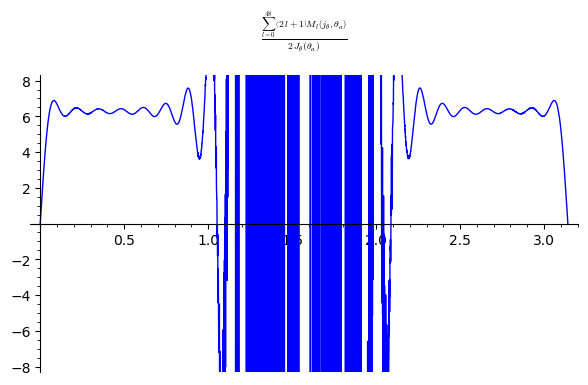

In [56]:
plot(L_sum_per_J_theta_a, theta_a, 0.0, pi-0.0,ymin=-8,ymax=8).show(
    title="$"+L_sum_per_J_theta_a_latex+"$\n")

In [57]:
exec(preparse("LL_sum_per_J_theta_a = lambda theta_a : "
              + str(L_sum_per_J_theta_a)))

In [58]:
d = pi/6
theta_1 = 0.2
theta_2 = 1

In [59]:
from scipy import integrate as scipy_integrate
integral = scipy_integrate.quad(LL_sum_per_J_theta_a, theta_1, theta_2)
integral

/tmp/ipykernel_689/2359694127.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = scipy_integrate.quad(LL_sum_per_J_theta_a, theta_1, theta_2)


(5.011801353924216, 0.0036515980985498686)

Таким образом множитель $n_{JL}$ составляет

In [60]:
n_JL = (integral[0] / (theta_2 - theta_1)).n()
n_JL

6.26475169240527

Теперь аппроксимация функции $2\,n_J\,j_{\theta}(\theta_m)$ суммой ряда $\sum_{l=0}^{LL}\, {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)$ может быть показана наглядно графически

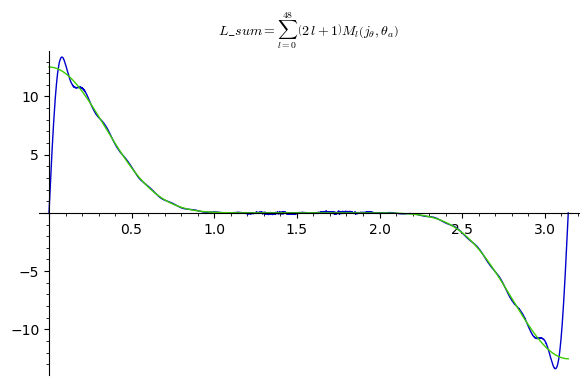

In [61]:
plot([L_sum, 2*J_theta(theta_a)*n_JL], theta_a, 0, pi).show(
  title="$L\\_sum="+L_sum_latex+"$")

Аналогичным способом может быть найден обратный коэффициент $k_{JL}$

In [62]:
J_theta_a_per_L_sum = 2*J_theta(theta_a)/L_sum
J_theta_a_per_L_sum_latex="{2\\,J_{\\theta}(\\theta_a)}/{"+L_sum_latex+"}"

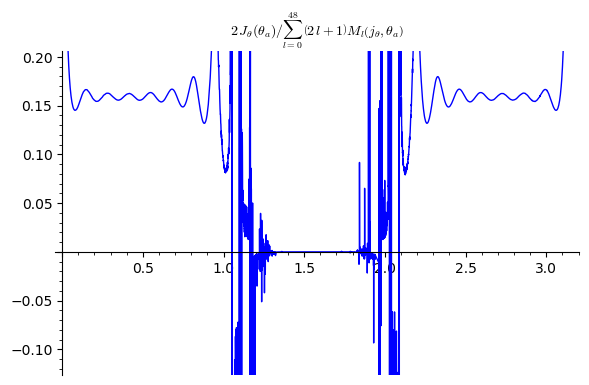

In [63]:
plot(J_theta_a_per_L_sum, theta_a, 0.0, pi-0.0,ymin=-0.12,ymax=0.2).show(
    title="$"+J_theta_a_per_L_sum_latex+"$")

In [64]:
exec(preparse("J_theta_a_per_M = lambda theta_a : "
              + str(J_theta_a_per_L_sum)))

In [65]:
from scipy import integrate as scipy_integrate
integral = scipy_integrate.quad(J_theta_a_per_M, theta_1, theta_2)
integral

/tmp/ipykernel_689/1755900364.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = scipy_integrate.quad(J_theta_a_per_M, theta_1, theta_2)


(0.12988611976244321, 0.00011890535221847909)

In [66]:
k_JL = (integral[0] / (theta_2 - theta_1)).n()
k_JL

0.162357649703054

In [67]:
L_approx_k = 2*J_theta(theta_a)/k_JL

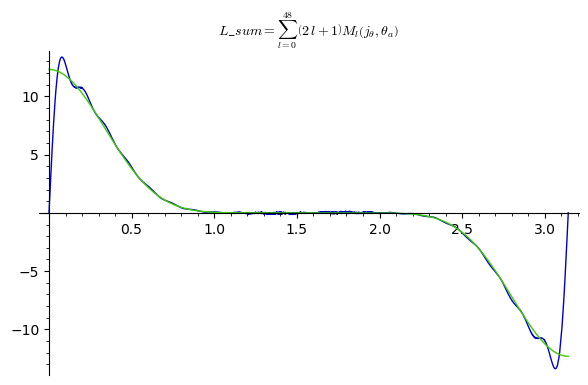

In [68]:
plot([L_sum, L_approx_k], theta_a, 0, pi).show(
    title="$L\\_sum="+L_sum_latex+"$")

Таким образом и выражение $L\left(j_{\theta}, \theta_a\right)={\sum\limits_{l=0}^{+\infty} {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)}$ найденное численно суммированием ряда не до бесконечности а до числа $LL$ может быть аппроксимировано через $2\,n_{JL}\,j_{\theta}(\theta_m)$

In [69]:
L_approx = 2*J_theta(theta_a)*n_JL
L_approx_latex = latex(L_approx)

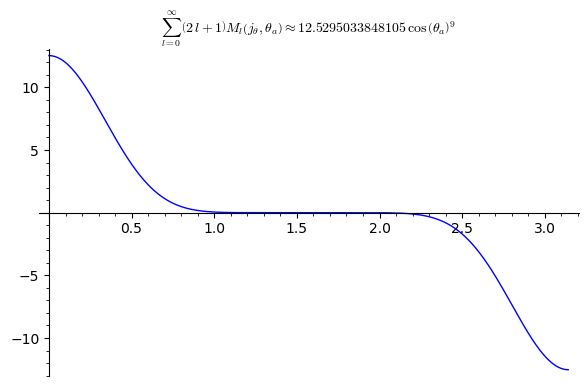

In [70]:
plot(L_approx, theta_a, 0, pi-0).show(
    title="$"+ L_latex + " \\approx " + L_approx_latex+"$")

Теперь рассмотрим слагаемое интегрального уравнения


\begin{equation}
\begin{array}{l}
N\left(j_r, j_{\theta}, r_a, \theta_a\right) = 
\sum\limits_{l=0}^{+\infty}
\left[
\left\{
{\left(l^{2} + 3 \, l + 2\right)} \cdot
R_2\left(l, j_r, r_a\right)
+ {\left(l^{2} - l\right)} \cdot
R_3\left(l, j_r, r_a\right)
\right\}
\cdot
M_l\left(j_{\theta}, \theta_a\right)
\right]
\end{array}
\end{equation}

где

$$R_2\left(l, j_r, r_a\right)=\int\limits_{0}^{r_{a}} r_m\,\frac{j_r(r_m)}{c} { \left(\frac{r_m}{r_a}\right)^{l+1}}\,
\,{d r_{m}}$$

$$R_3\left(l, j_r, r_a\right)=\int\limits_{r_{a}}^{+\infty} r_m\,\frac{j_r(r_m)}{c} {\left(\frac{r_a}{r_m}\right)^l}\,
\,{d r_{m}}$$

In [71]:
N_sum_latex="\\sum_{l=0}^{"+str(LL)+"}\\,\\left[\\left\\{{\\left(l^{2} + 3 \\, l + 2\\right)} \\cdot R_2\\left(l, r_a\\right)+ {\\left(l^{2} - l\\right)} \\cdot R_3\\left(l, r_a\\right)\\right\\}\\cdot M_l\\left(j_{\\theta}, \\theta_a\\right)\\right]"
N_latex = "N\\left(j_r, j_{\\theta}, r_a, \\theta_a\\right)"

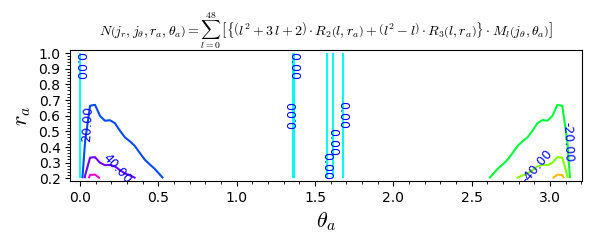

In [72]:
contour_plot(N_sum
        , (theta_a,0,pi), (r_a,0.2,1), fill=False, cmap='hsv', labels=True, 
title = "$" + N_latex + "="
    +N_sum_latex+"$",
axes_labels=["$\\theta_a$", "$r_a$"])

Мы можем найти множитель с помощью которого можно убрать зависимость $N\left(j_r, j_{\theta}, r_a, \theta_a\right)$ от $r_a$

In [73]:
pra = 1/J_r(r_a)/r_a^2
latex_pra=latex(pra)
pra

r_a

Умножая теперь $N\left(j_r, j_{\theta}, r_a, \theta_a\right)$ на этот множитель получаем новую функцию зависящую лишь от $\left(j_r, j_{\theta}, \theta_a\right)$

In [74]:
N_sum_pra = (N_sum * pra).full_simplify()
N_sum_pra_latex = latex_pra + "\\cdot" + N_sum_latex
N_pra_latex = latex_pra + "\\cdot" + N_latex

И что интересно, эта новая функция как-то очень уж близко походит по своей форме на сумму ряда $\sum_{l=0}^{LL}\, {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)$

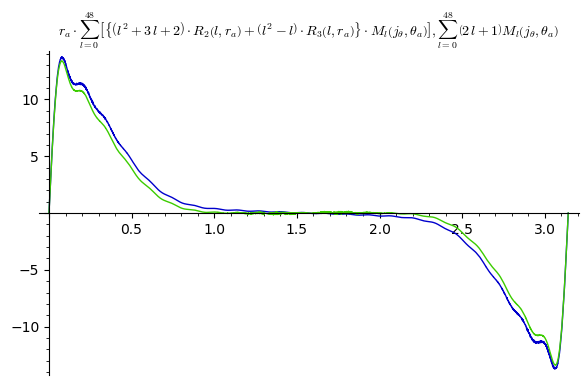

In [75]:
plot([N_sum_pra, L_sum], theta_a, 0, pi).show(
    title="$"+N_sum_pra_latex+", " + L_sum_latex+"$")

А раз так, то имеет смысл найти для этой функции также найти аппроксимационный множитель

$$2 \, n_{JN} \cdot j_{\theta}(\theta_m) \approx N\_sum \cdot r_a$$


In [76]:
N_sum_pra_per_J_theta_a = N_sum_pra/(2*J_theta(theta_a))
N_sum_pra_per_J_theta_a_latex="\\frac{"+N_sum_pra_latex+"}{{2\\,J_{\\theta}(\\theta_a)}}"

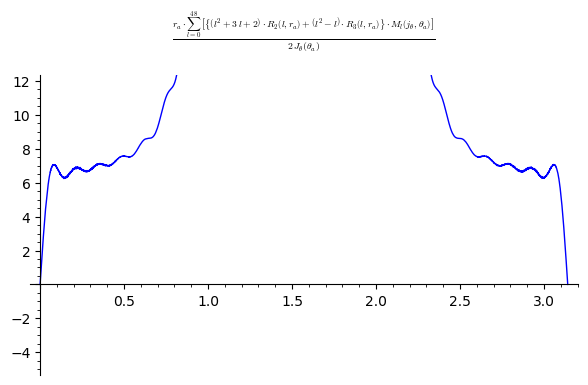

In [77]:
plot(N_sum_pra_per_J_theta_a, theta_a, 0.0, pi-0.0,ymin=-5,ymax=12).show(
    title="$"+N_sum_pra_per_J_theta_a_latex+"$\n")

In [78]:
exec(preparse("NN_mra_per_J_theta_a = lambda theta_a : "
              + str(N_sum_pra_per_J_theta_a)))

In [79]:
from scipy import integrate as scipy_integrate
integral = scipy_integrate.quad(NN_mra_per_J_theta_a, 0.2, 0.4)
integral

/tmp/ipykernel_689/2946991449.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = scipy_integrate.quad(NN_mra_per_J_theta_a, RealNumber('0.2'), RealNumber('0.4'))


(1.378044168669813, 0.00037612691208499527)

In [80]:
n_JN = (integral[0] / (.2)).n()
n_JN

6.89022084334906

Для сравнения

In [81]:
n_JL

6.26475169240527

In [82]:
N_approx = 2*J_theta(theta_a)*n_JN
N_approx_latex = latex(N_approx)

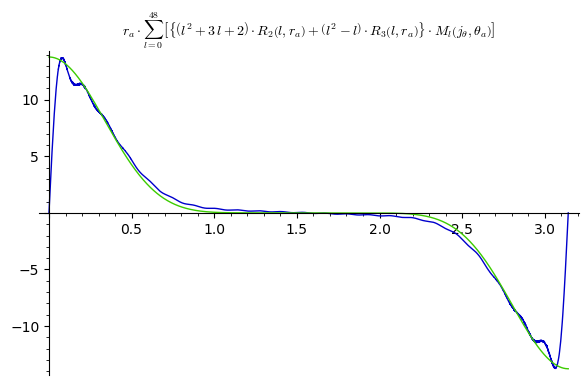

In [83]:
plot([N_sum_pra, N_approx], theta_a, 0, pi).show(
    title="$"+N_sum_pra_latex+"$")

Аналогичным способом может быть найден обратный коэффициент $k_{JN}$

In [84]:
J_theta_a_per_N_sum_pra = 2*J_theta(theta_a)/N_sum_pra
J_theta_a_per_N_sum_pra_latex="{2\\,J_{\\theta}(\\theta_a)}/{"+N_sum_pra_latex+"}"

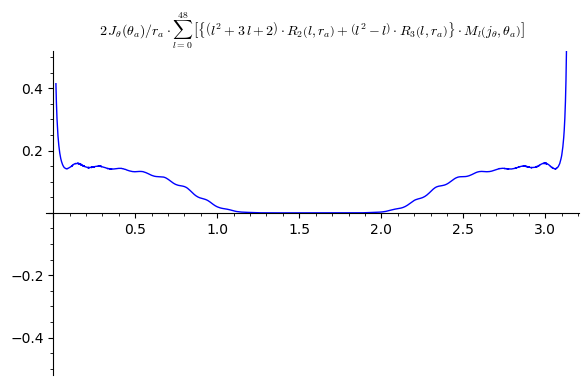

In [85]:
plot(J_theta_a_per_N_sum_pra, theta_a, 0.0, pi-0.0,ymin=-0.5,ymax=0.5).show(
    title="$"+J_theta_a_per_N_sum_pra_latex+"$")

In [86]:
exec(preparse("J_theta_a_per_N_pra = lambda theta_a : "
              + str(J_theta_a_per_N_sum_pra)))

In [87]:
theta_1 = 0.05
theta_2 = 0.3

In [88]:
from scipy import integrate as scipy_integrate
integral = scipy_integrate.quad( \
            J_theta_a_per_N_pra, theta_1, theta_2)
integral

/tmp/ipykernel_689/3611323383.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = scipy_integrate.quad(             J_theta_a_per_N_pra, theta_1, theta_2)


(0.03749151064105397, 5.6614830193160715e-06)

In [89]:
k_JN = (integral[0] / (theta_2 - theta_1)).n()
k_JN

0.149966042564216

In [90]:
N_approx_k = 2*J_theta(theta_a)/k_JN

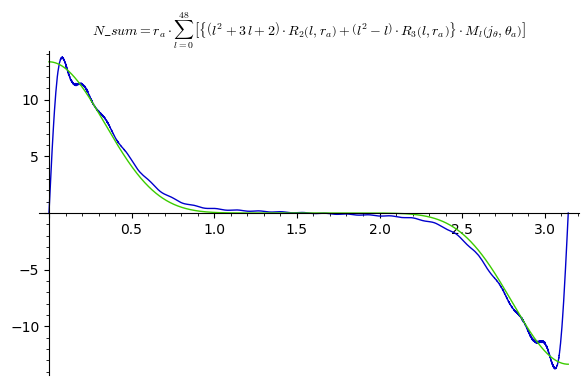

In [91]:
plot([N_sum_pra, N_approx_k], theta_a, 0, pi).show(
    title="$N\\_sum="+N_sum_pra_latex+"$")

Учитывая краткую запись интегрального уравнения

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_{a}^2} \left(
\frac{2 \, \cot\left(\theta_{a}\right)}{r_{a}}\,
+ N\left(j_r, j_{\theta}, r_a, \theta_a\right)
\right)
\end{array}
\end{equation}

Производим следующую цепь преобразований


\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \frac{1}{L\left(j_{\theta}, \theta_a\right)}\frac{1}{r_{a}^2} \left(
\frac{2 \,\cot\left(\theta_{a}\right)}{r_{a}}\,
+ \frac{\left(r_a \cdot N\right)\left(j_r, j_{\theta}, \theta_a\right)}{r_{a}}
\right)
\end{array}
\end{equation}


\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c} = \frac{1}{r_{a}^3}\frac{1}{L\left(j_{\theta}, \theta_a\right)} \left(
{2 \, \cot\left(\theta_{a}\right)}\,
+ {\left(r_a \cdot N\right)\left(j_r, j_{\theta}, \theta_a\right)}
\right)
\end{array}
\end{equation}



\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c}\,{r_{a}^3} = \frac{1}{L\left(j_{\theta}, \theta_a\right)} \left(
{2 \, \cot\left(\theta_{a}\right)}\,
+ {\left(r_a \cdot N\right)\left(j_r, j_{\theta}, \theta_a\right)}
\right)
\end{array}
\end{equation}

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c}\,{r_{a}^3} = \frac{2 \, \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)} + \frac{\left(r_a \cdot N\right)\left(j_r, j_{\theta}, \theta_a\right)}{L\left(j_{\theta}, \theta_a\right)}
\end{array}
\end{equation}

Учитывая ранее найденные выражения для аппроксимационных множителей

$$2 \, n_{JL} \cdot j_{\theta}(\theta_m) \approx L\_sum$$


$$2 \, n_{JN} \cdot j_{\theta}(\theta_m) \approx N\_sum \cdot r_a$$

находим далее

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c}\,{r_{a}^3} = \frac{2 \, \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)} + \frac{2\,J_{\theta}(\theta_a)\cdot n_{JN}}{2\,J_{\theta}(\theta_a)\cdot n_{JL}}
\end{array}
\end{equation}


\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c}\,{r_{a}^3} = \frac{2 \, \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)} + \frac{n_{JN}}{n_{JL}}
\end{array}
\end{equation}

In [92]:
n_JN/n_JL

1.09983941609402

Теперь рассмотрим отношение $\frac{2 \, \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)}$

In [93]:
2*cot(theta_a)/L_approx

0.159623245916082*cot(theta_a)/cos(theta_a)^9

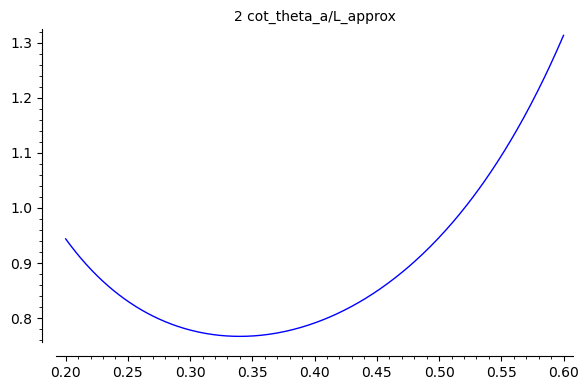

In [94]:
two_cot_theta_a_per_L_approx = 2*cot(theta_a)/L_approx
plot(two_cot_theta_a_per_L_approx, theta_a, 0.2, 0.6).show(
    title="2 cot_theta_a/L_approx")

Найдем для этого соотношения аппроксимационный множитель

In [95]:
exec(preparse("two_cot_theta_a_per_L = lambda theta_a : "
              + str(two_cot_theta_a_per_L_approx)))

In [96]:
theta_1 = 0.3
theta_2 = 0.4

In [97]:
from scipy import integrate as scipy_integrate
integral = scipy_integrate.quad( \
            two_cot_theta_a_per_L, theta_1, theta_2)
integral

(0.07734493563359933, 8.587012837857269e-16)

In [98]:
n_Lcot = (integral[0] / (theta_2 - theta_1)).n()
n_Lcot

0.773449356335993

Рассмотрим на графике точность аппроксимации

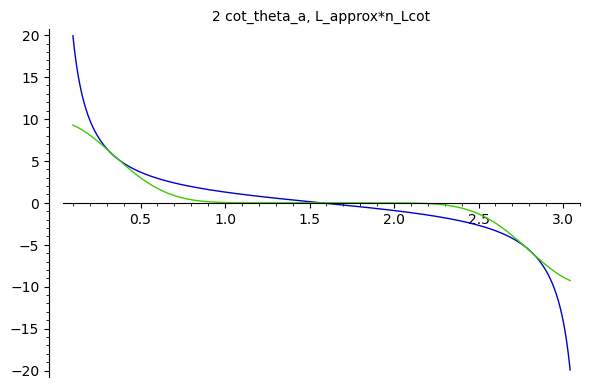

In [99]:
plot([2*cot(theta_a), L_approx*n_Lcot], theta_a, 0.1, pi-0.1).show(
    title="2 cot_theta_a, L_approx*n_Lcot")

Теперь мы можем найти правую часть в уравнении

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c}\,{r_{a}^3} = \frac{2 \, \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)} + \frac{n_{JN}}{n_{JL}}
\end{array}
\end{equation}

In [100]:
n_jr = n_Lcot + n_JN/n_JL

In [ ]:
n_jr

# Сводка некоторых решений

Инициализировав

$J_{\theta} = cos(\theta_m)$

$J_r = \frac{1}{r_m^{5/2}}$

После первой итерации получено приблизительно (если отбросить уход на бесконечность в районе полюсов)

\begin{equation}
\begin{array}{l}
j_r(r_a) = \frac{1.04 ... 1.16}{r_{a}^{5/2}}  +  \frac{0.15 ... 0.30}{r_{a}^3}
\end{array}
\end{equation}

Инициализировав

$J_{\theta} = cos(\theta_m)$

$J_r = \frac{1}{r_m^{3}}$

После первой итерации получено приблизительно (если отбросить уход на бесконечность в районе полюсов)

\begin{equation}
\begin{array}{l}
j_r(r_a) = \frac{1.05 ... 1.4}{r_{a}^{3}}  +  \frac{0.15 ... 0.30}{r_{a}^3} \approx \frac{1.58}{r_{a}^3}
\end{array}
\end{equation}

1.58746627066120

1.58696297034228

Инициализировав

$J_{\theta} = cos^9(\theta_m)$

$J_r = \frac{1}{r_m^{3}}$

После первой итерации получено приблизительно

\begin{equation}
\begin{array}{l}
j_r(r_a) = \frac{1.099}{r_{a}^{3}}  +  \frac{0.77}{r_{a}^3} \approx \frac{1.87}{r_{a}^3}
\end{array}
\end{equation}

1.87252689112828

Инициализировав

$J_{\theta} = cot(\theta_m)$

$J_r = \frac{1}{r_m^{3}}$

После первой итерации получено приблизительно (если отбросить уход на бесконечность в районе полюсов)

\begin{equation}
\begin{array}{l}
j_r(r_a) \approx \frac{1..1.5}{r_{a}^3}
\end{array}
\end{equation}

1.81479226773228

# Проверка найденного решения интегрального уравнения методом подстановки в формулу для вычисления векторного потенциала

Рассмотрим формулу векторного потенциала для системы распределённых кольцевых магнитных токов

\begin{equation}
\begin{array}{c}
A_q = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c\,r_a} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m } }{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m \\ +
\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{c\,r_m} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_a}{r_m} \right)}^{l}}\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m }}{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

$j_m(r_m, \theta_m) = j_r(r_m) \, j_{\theta}(\theta_m) = q_r(r_m) \, q_{\theta}(\theta_m)\, \omega_{r} (r_m)\, \omega_{\theta} (\theta_m)$ - плотность магнитного тока

\begin{equation}
\begin{array}{c}
A_q = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_r(r_m) \, j_{\theta}(\theta_m) \,\sin \theta_m\, r_m^2}{c\,r_a} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m } }{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m \\ +
\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{j_r(r_m) \, j_{\theta}(\theta_m) \,\sin \theta_m\, r_m^2}{c\,r_m} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_a}{r_m} \right)}^{l}}\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m }}{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

\begin{equation}
\begin{array}{c}
A_q = 
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=0}^{r_a}\,
\int\limits_{\theta_m=0}^{\pi}\,
\frac{j_r(r_m) \, j_{\theta}(\theta_m) \,\sin \theta_m\, r_m^2}{c\,r_a}
{{\left( \frac{r_m}{r_a} \right)}^{l}}
\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m } }{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m \\ +
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=r_a}^{\infty}\,
\int\limits_{\theta_m=0}^{\pi}\,
\frac{j_r(r_m) \, j_{\theta}(\theta_m) \,\sin \theta_m\, r_m^2}{c\,r_m}
{{\left( \frac{r_a}{r_m} \right)}^{l}}
\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m }}{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

\begin{equation}
\begin{array}{c}
A_q = 
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=0}^{r_a}\,
j_r(r_m) \,{{\left( \frac{r_m}{r_a} \right)}^{l}}
\int\limits_{\theta_m=0}^{\pi}\,
\frac{ j_{\theta}(\theta_m) \, r_m^2}{c\,r_a}\,\sin \theta_m
\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m } }{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m \\ +
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=r_a}^{\infty}\,
j_r(r_m) \,{{\left( \frac{r_a}{r_m} \right)}^{l}}
\int\limits_{\theta_m=0}^{\pi}\,
\frac{ j_{\theta}(\theta_m) \, r_m^2}{c\,r_m}\,\sin \theta_m
\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m }}{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

\begin{equation}
\begin{array}{c}
A_q = 
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=0}^{r_a}\,
j_r(r_m) \,{{\left( \frac{r_m}{r_a} \right)}^{l}}\,\frac{ j_{\theta}(\theta_m) \, r_m^2}{c\,r_a}
\int\limits_{\theta_m=0}^{\pi}\,
\,\sin \theta_m
\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m } }{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m \\ +
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=r_a}^{\infty}\,
j_r(r_m) \,{{\left( \frac{r_a}{r_m} \right)}^{l}}\,\frac{ j_{\theta}(\theta_m) \, r_m^2}{c\,r_m}
\int\limits_{\theta_m=0}^{\pi}\,
\,\sin \theta_m
\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m }}{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

\begin{equation}
\begin{array}{c}
A_q = 
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=0}^{r_a}\,
j_r(r_m) \,{{\left( \frac{r_m}{r_a} \right)}^{l}}\,\frac{ r_m^2}{c\,r_a} \,d r_m
\int\limits_{\theta_m=0}^{\pi}\,
\,j_{\theta}(\theta_m) \, \sin \theta_m
\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m } }{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \\ +
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=r_a}^{\infty}\,
j_r(r_m) \,{{\left( \frac{r_a}{r_m} \right)}^{l}}\,\frac{ r_m^2}{c\,r_m} \,d r_m
\int\limits_{\theta_m=0}^{\pi}\,
\,j_{\theta}(\theta_m) \, \sin \theta_m
\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m }}{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m
\end{array}
\end{equation}

Обозначим

$S_{l}(\theta_m, \theta_a) = \left(\int\limits_{{\left(\varphi_m - \varphi_a\right)}=0}^{2\pi}\,{cos\,{{\left(\varphi_m - \varphi_a\right)} } }{P_l} \cos \left( \gamma  \right)\, d {\left(\varphi_m - \varphi_a\right)}\right)$

Введя обозначение

$$M_l\left(j_{\theta}, \theta_a\right)={\int\limits_{0}^{\pi} j_{\theta}(\theta_m)\,S_l(\theta_m, \theta_a)\,sin\left(\theta_m\right)\,{d \theta_{m}}}$$

\begin{equation}
\begin{array}{c}
A_q = 
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=0}^{r_a}\,
j_r(r_m) \,{{\left( \frac{r_m}{r_a} \right)}^{l}}\,\frac{ r_m^2}{c\,r_a} \,d r_m
M_l\left(j_{\theta}, \theta_a\right) \\ +
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=r_a}^{\infty}\,
j_r(r_m) \,{{\left( \frac{r_a}{r_m} \right)}^{l}}\,\frac{ r_m^2}{c\,r_m} \,d r_m
M_l\left(j_{\theta}, \theta_a\right)
\end{array}
\end{equation}

\begin{equation}
\begin{array}{c}
A_q = \Bigg\{
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=0}^{r_a}\,
j_r(r_m) \,{{\left( \frac{r_m}{r_a} \right)}^{l}}\,\frac{ r_m^2}{r_a} \,d r_m +
\sum\limits_{l=0}^{\infty }
\int\limits_{r_m=r_a}^{\infty}\,
j_r(r_m) \,{{\left( \frac{r_a}{r_m} \right)}^{l}}\,\frac{ r_m^2}{r_m} \,d r_m
\Bigg\}
\frac{M_l\left(j_{\theta}, \theta_a\right)}{c}
\end{array}
\end{equation}

Вводим дополнительные обозначение

$$R_2\left(l, j_r, r_a\right)=\int\limits_{0}^{r_{a}} r_m\,j_r(r_m) { \left(\frac{r_m}{r_a}\right)^{l+1}}\,
\,{d r_{m}}$$

$$R_3\left(l, j_r, r_a\right)=\int\limits_{r_{a}}^{+\infty} r_m\,j_r(r_m) {\left(\frac{r_a}{r_m}\right)^l}\,
\,{d r_{m}}$$


теперь мы получили формулу

\begin{equation}
\begin{array}{c}
A_q = \Bigg\{
\sum\limits_{l=0}^{\infty }
R_2\left(l, j_r, r_a\right) +
\sum\limits_{l=0}^{\infty }
R_3\left(l, j_r, r_a\right)
\Bigg\}
\frac{M_l\left(j_{\theta}, \theta_a\right)}{c}
\end{array}
\end{equation}

расчёта векторного потенциала на основе заданного распределения магнитных токов

# Проверка найденного решения интегрального уравнения методом подстановки в формулу для вычисления скалярного магнитного кулоновского потенциала

Рассмотрим формулу скалярного магнитного кулоновского потенциала для системы распределённых кольцевых магнитных зарядов

$$\phi_m = \int\limits_{V}^{}\frac{{\rho_m}}{R} dV$$

where ${{\rho_m}}$ is density of magnetic charge

$${{\rho_m}} \sim \frac{cos(\theta_m)^{2k+1}}{r^{2}} $$

and
 
$${{\omega_m}} \sim \frac{1}{r} $$

is angular frequency of magnetic charge

$j_m(r_m, \theta_m) = j_r(r_m) \, j_{\theta}(\theta_m) = \rho_r(r_m) \, \rho_{\theta}(\theta_m)\, \omega_{r} (r_m)\, \omega_{\theta} (\theta_m)$ - плотность магнитного тока

\begin{equation}
\begin{array}{c}
\phi_m = 
\int\limits_{r_m=0}^{r_a}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{\rho_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{r_a} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_m}{r_a} \right)}^{l}}\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m } }{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m \\ +
\int\limits_{r_m=r_a}^{\infty}\,\int\limits_{\theta_m=0}^{\pi}\,\frac{\rho_m(r_m, \theta_m) \,\sin \theta_m\, r_m^2}{r_m} \sum\limits_{l=0}^{\infty }{{\left( \frac{r_a}{r_m} \right)}^{l}}\left(\int\limits_{\varphi_m=0}^{2\pi}\,{cos\,{\varphi_m }}{P_l} \cos \left( \gamma  \right)\, d \varphi_m\right) \, d \theta_m \,d r_m
\end{array}
\end{equation}

Произведя такие же преобразования которые были произведены для векторного потенциала мы получим формулу

\begin{equation}
\begin{array}{c}
\phi_m = \Bigg\{
\sum\limits_{l=0}^{\infty }
R_2\left(l, \rho_r, r_a\right) +
\sum\limits_{l=0}^{\infty }
R_3\left(l, \rho_r, r_a\right)
\Bigg\}
{M_l\left(\rho_{\theta}, \theta_a\right)}
\end{array}
\end{equation}

расчёта скалярного магнитного кулоновского потенциала на основе заданного распределения плотности магнитных зарядов

In [101]:
# Интеграл R2
# Интеграл R3

sum_cAm = 0
sum_phi = 0

for ll in range(0,LL):
    Mll_j = Ml(l=ll, j_theta=J_theta(theta_m), theta_a=theta_a)
    Mll_m = Ml(l=ll, j_theta=rho_theta(theta_m), theta_a=theta_a)
    if Mll_j == 0:
        continue

    R2_j = integrate(r_m * J_r (r_m) * (r_m / r_a)^(ll+1), r_m, 0, r_a)
    R3_j = integrate(r_m * J_r (r_m) * (r_a / r_m)^(ll), r_m, r_a, Infinity)
    R2_m = integrate(r_m * rho_r (r_m) * (r_m / r_a)^(ll+1), r_m, 0, r_a)
    R3_m = integrate(r_m * rho_r (r_m) * (r_a / r_m)^(ll), r_m, r_a, Infinity)

    sum_cAm += n_jr * (R2_j + R3_j) * Mll_j
    sum_phi += n_jr * (R2_m + R3_m) * Mll_m

In [102]:
sum_cAm_latex="\\sum_{l=0}^{"+str(LL)+"}\\,\\left[\\left\\{ R_2\\left(l, r_a\\right)+ R_3\\left(l, r_a\\right)\\right\\}\\cdot M_l\\left(j_{\\theta}, \\theta_a\\right)\\right]"

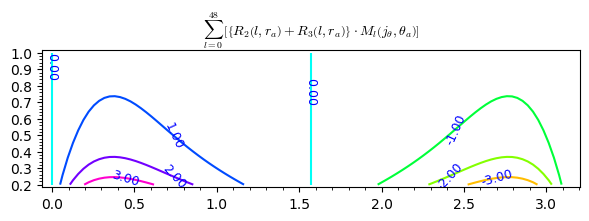

In [103]:
contour_plot(sum_cAm
        , (theta_a,0,pi), (r_a,0.2,1), fill=False, cmap='hsv', labels=True, 
title = "$"+sum_cAm_latex+"$")

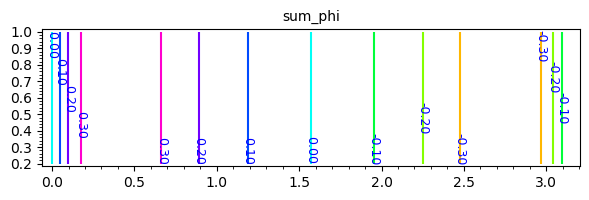

In [55]:
contour_plot(sum_phi
        , (theta_a,0,pi), (r_a,0.2,1), fill=False, cmap='hsv', labels=True, 
title = "sum_phi")

In [104]:
sum_cAm_pra = (sum_cAm * pra).full_simplify()
sum_cAm_pra_latex = latex_pra + "\\cdot" + sum_cAm_latex

Векторный потенциал электростатического поля точечного заряда в сферической системе координат

$${r_a} A_{\varphi} = - {сtg \, \theta_a}$$

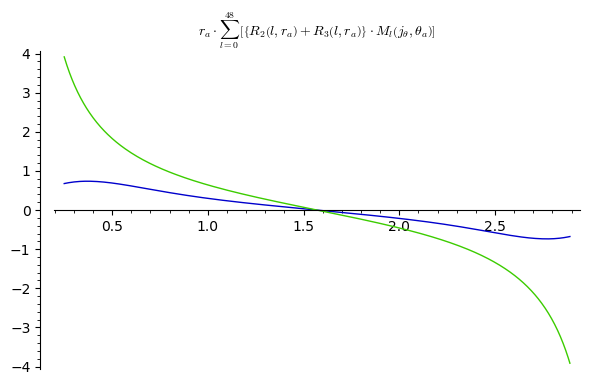

In [105]:
plot([sum_cAm_pra, cot(theta_a)], theta_a, 0.25, pi-0.25).show(
    title="$"+sum_cAm_pra_latex+"$")

# Поиск решения в виде ряда

Поскольку для любого значения $k$ используя следующую функцию инициализации решения
$j_{\theta} = cos(\theta_m)^{2k+1}$
для ряда $L\left(j_{\theta}, \theta_a\right)={\sum\limits_{l=0}^{+\infty} {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)}$ можно найти аппроксимацию в виде $L\left(j_{\theta}, \theta_a\right) \approx 2\,n_{JL}\,j_{\theta}(\theta_m)$ при этом для отношения $\frac{2 \, \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)}$ получается

$$\frac{2 \, \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)} \approx \frac{2 \, \cot\left(\theta_{a}\right)}{2\,n_{JL}\,j_{\theta}(\theta_m)} = \frac{\cot\left(\theta_{a}\right)}{{n_{{JL}_k}}\,cos(\theta_m)^{2k+1}}$$


In [ ]:
from scipy import integrate as scipy_integrate
integral = scipy_integrate.quad(NN_mra_per_J_theta_a, 0.2, 0.4)

\begin{equation}
\begin{array}{l}
\frac{j_r(r_a)}{c}\,{r_{a}^3} = \frac{\cot\left(\theta_{a}\right)}{n_{JL}\,j_{\theta}(\theta_m))} + \frac{n_{JN}}{n_{JL}}
\end{array}
\end{equation}

Данные рассуждения приводят к мысли, что имеет смысл искать решение в виде суммы $j_{\theta} = \frac{1}{n}\sum\limits_{k} {n_{{JL}_k}} \cdot cos(\theta_m)^{2k+1}$ с целью улучшения аппроксимации функции котангенса в ее основной центральной части, исключая область полюсов

Прежде чем искать это общее решение найдём для начала коэффициенты ${n_{JN}}$ и ${n_{JL}}$ для разных $k$

In [ ]:
k_mJ = []
for k in range (0, 12):
    print("k=", k)
    
    d = pi/6
    theta_1L = 0.2
    theta_2L = 0.4

    # инициализируем неизвестную функцию как
    J_theta = lambda theta_m : cos(theta_m)^(2*k+1)
    J_r = lambda r_m : 1 / r_m^(3)

    #k_mJ += [iterate_integral_equation(k, J_theta, J_r, theta_1, theta_2)]
    #def iterate_integral_equation(k, J_theta, J_r, theta_1, theta_2):
    # находим основные слагаемые интегрального уравнения
    from scipy import integrate as scipy_integrate
    
    N_sum = 0
    L_sum = 0
    cAm_sum = 0

    for ll in range(0,LL):
        Mll = Ml(l=ll, j_theta=J_theta(theta_m), theta_a=theta_a)
        if 0 == Mll:
            continue
        L_sum += Kl1(ll)*Mll
        R2 = integrate(r_m * J_r (r_m) * (r_m / r_a)^(ll+1), r_m, 0, r_a)
        R3 = integrate(r_m * J_r (r_m) * (r_a / r_m)^(ll), r_m, r_a, Infinity)
        #print(Mll, "|*|", int_R2, "|||", int_R3)
        R23 = Kl2(ll) * R2 + Kl3(ll) * R3
        N_l = R23 * Mll
        #print("N_l :", N_l)
        N_sum += N_l
        cAm_sum += (R2 + R3) * Mll

    # Замечая, что функция $j_{\theta}(\theta_m)$
    # помноженная на множитель $2 m_JL$
    # может быть приблизительно аппроксимирована
    # суммой ряда
    # $\sum_{l=0}^{LL}\, {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)$
    # найдем множитель $m_JL$ графическим методом
    # и методом интегрирования
    
    L_sum_per_J_theta_a = L_sum/(2*J_theta(theta_a))
    plot(L_sum_per_J_theta_a,
         theta_a, 0.0, pi,
         ymin=5,ymax=8).show(
        title="$"+L_sum_per_J_theta_a_latex+"$\n")

    exec(preparse("sum_of_LL_per_J_theta_a = lambda theta_a : "
              + str(L_sum_per_J_theta_a)))
    
    integral = scipy_integrate.quad(sum_of_LL_per_J_theta_a,
                                    theta_1L, theta_2L)

    # Таким образом множитель $m_{JL}$ составляет
    n_JL = (integral[0] / (theta_2L - theta_1L)).n()
    print("theta_1, theta_2=", theta_1, theta_2)
    print("integral=", integral)
    print("n_JL=", n_JL)

    # Теперь аппроксимация функции
    # $2\,m_J\,j_{\theta}(\theta_m)$
    # суммой ряда $\sum_{l=0}^{LL}\, {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)$
    # может быть показана наглядно графически

    # Таким образом и выражение
    # $L\left(j_{\theta}, \theta_a\right)={\sum\limits_{l=0}^{+\infty} {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)}$ найденное численно суммированием ряда не до бесконечности а до числа $LL$
    # может быть аппроксимировано через
    # $2\,m_{JL}\,j_{\theta}(\theta_m)$

    L_approx = 2*J_theta(theta_a)*n_JL
    L_approx_latex = latex(L_approx)

    plot([L_sum, L_approx], theta_a, 0, pi).show(
        title="$"+L_sum_latex+","+L_approx_latex+"$")
    
    # Аналогичным способом может быть найден обратный коэффициент $k_{JL}$

    J_theta_a_per_L_sum = 2*J_theta(theta_a)/L_sum
    J_theta_a_per_L_sum_latex="{2\\,J_{\\theta}(\\theta_a)}/{"+L_sum_latex+"}"

    plot(J_theta_a_per_L_sum, theta_a, 0.0, pi-0.0,ymin=0.12,ymax=0.2).show(
        title="$"+J_theta_a_per_L_sum_latex+"$")

    exec(preparse("J_theta_a_per_LL = lambda theta_a : "
                  + str(J_theta_a_per_L_sum)))

    from scipy import integrate as scipy_integrate
    integral = scipy_integrate.quad(J_theta_a_per_LL,
                                    theta_1L, theta_2L)

    k_JL = (integral[0] / (theta_2L - theta_1L)).n()
    print("integral=", integral)
    print("k_JL=", k_JL)

    L_approx_k = 2*J_theta(theta_a)/k_JL

    plot([L_sum, L_approx_k], theta_a, 0, pi).show(
        title="$L\\_sum="+L_sum_latex+"$")

    # Теперь рассмотрим слагаемое интегрального уравнения
    # N\left(j_r, j_{\theta}, r_a, \theta_a\right)

    # Умножая теперь
    # $N\left(j_r, j_{\theta}, r_a, \theta_a\right)$
    # на этот множитель получаем новую функцию
    # зависящую лишь от $\left(j_r, j_{\theta}, \theta_a\right)$

    N_sum_pra = (N_sum * pra).full_simplify()

    # имеет смысл найти для этой функции также
    # найти аппроксимационный множитель

    N_sum_pra_per_J_theta_a = N_sum_pra/(2*J_theta(theta_a))

    plot(N_sum_pra_per_J_theta_a, theta_a, 0.0, pi-0.0,ymin=5,ymax=8).show(
        title="$"+N_sum_pra_per_J_theta_a_latex+"$\n")

    exec(preparse("sum_of_NN_pra_per_J_theta_a = lambda theta_a : "
                  + str(N_sum_pra_per_J_theta_a)))

    integral = scipy_integrate.quad(sum_of_NN_pra_per_J_theta_a,
                                    0.2, 0.4)

    n_JN = (integral[0] / (.2)).n()
    print("integral=", integral)
    print("n_JN=", n_JN)

    N_approx = 2*J_theta(theta_a)*n_JN
    N_approx_latex = latex(N_approx)

    plot([N_sum_pra, N_approx], theta_a, 0, pi).show(
        title="$"+N_sum_pra_latex+","+N_approx_latex+"$")

    # Аналогичным способом может быть найден обратный коэффициент $k_{JN}$

    J_theta_a_per_N_sum_pra = 2*J_theta(theta_a)/N_sum_pra
    J_theta_a_per_N_sum_pra_latex="{2\\,J_{\\theta}(\\theta_a)}/{"+N_sum_pra_latex+"}"

    plot(J_theta_a_per_N_sum_pra, theta_a, 0.0, pi-0.0,ymin=0.,ymax=0.2).show(
        title="$"+J_theta_a_per_N_sum_pra_latex+"$")

    exec(preparse("J_theta_a_per_NN = lambda theta_a : "
                  + str(J_theta_a_per_N_sum_pra)))

    theta_1 = 0.05
    theta_2 = 0.3

    from scipy import integrate as scipy_integrate
    integral = scipy_integrate.quad( \
                J_theta_a_per_NN, theta_1, theta_2)

    k_JN = (integral[0] / (theta_2 - theta_1)).n()

    N_approx_k = 2*J_theta(theta_a)/k_JN
    plot([N_sum_pra, N_approx_k], theta_a, 0, pi).show(
        title="$N\\_sum="+N_sum_pra_latex+"$")
    
    
    # Теперь рассмотрим отношение $\frac{2 \, \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)}$

    # 2*cot(theta_a)/L_approx

    two_cot_theta_a_per_L_approx = 2*cot(theta_a)/L_approx
    plot(two_cot_theta_a_per_L_approx, theta_a, 0.2, 0.6).show(
        title="2 cot_theta_a/L_approx")

    # Найдем для этого соотношения аппроксимационный множитель

    exec(preparse("two_cot_theta_a_per_L = lambda theta_a : "
                  + str(two_cot_theta_a_per_L_approx)))

    theta1 = 0.3
    theta2 = 0.4

    integral = scipy_integrate.quad( \
                two_cot_theta_a_per_L, theta1, theta2)

    n_Jcot = (integral[0] / (theta2 - theta1)).n()

    # Рассмотрим на графике точность аппроксимации

    plot([2*cot(theta_a), L_approx*n_Jcot], theta_a, 0.1, pi-0.1).show(
        title="2 cot_theta_a/L_approx")

    # Теперь мы можем найти правую часть в уравнении
    # \frac{j_r(r_a)}{c}\,{r_{a}^3} = 
    # \frac{2 \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)}
    # + \frac{n_{JN}}{n_{JL}}

    # n_Jcot + n_JN/n_JL
    n_jr = n_Lcot + n_JN/n_JL
    k_mJ += [(k, n_JL, k_JL, n_JN, k_JN, n_Jcot, n_jr)]
    
    # Проверка найденного решения интегрального уравнения
    # методом подстановки в формулу
    # для вычисления векторного потенциала
    
    cAm_sum = 0

    for ll in range(0,LL):
        Mll = Ml(l=ll, j_theta=J_theta(theta_m), theta_a=theta_a)
        if 0 == Mll:
            continue
        R2 = integrate(r_m * J_r (r_m) * (r_m / r_a)^(ll+1), r_m, 0, r_a)
        R3 = integrate(r_m * J_r (r_m) * (r_a / r_m)^(ll), r_m, r_a, Infinity)
        #print(Mll, "|*|", int_R2, "|||", int_R3)
        R23 = n_jr * (R2 + R3)
        R23_Ml = R23 * Mll
        #print("R23_Ml :", R23_Ml)
        cAm_sum += R23_Ml
    
    cAm_sum_pra = (cAm_sum * pra).full_simplify()
    plot([cAm_sum_pra, -cot(theta_a)], theta_a, 0.25, pi-0.25).show(
        title="$"+sum_cAm_pra_latex+"$")


In [ ]:
k_mJ

In [ ]:
def iterate_integral_equation(k, J_theta, J_r,
                              theta_1L, theta_2L,
                              theta_1N, theta_2N,
                              theta_1c, theta_2c
                             ):
    # находим основные слагаемые интегрального уравнения
    from scipy import integrate as scipy_integrate
    
    N_sum = 0
    L_sum = 0
    cAm_sum = 0

    for ll in range(0,LL):
        Mll = Ml(l=ll, j_theta=J_theta(theta_m), theta_a=theta_a)
        if 0 == Mll:
            continue
        L_sum += Kl1(ll)*Mll
        R2 = integrate(r_m * J_r (r_m) * (r_m / r_a)^(ll+1), r_m, 0, r_a)
        R3 = integrate(r_m * J_r (r_m) * (r_a / r_m)^(ll), r_m, r_a, Infinity)
        #print(Mll, "|*|", int_R2, "|||", int_R3)
        R23 = Kl2(ll) * R2 + Kl3(ll) * R3
        N_l = R23 * Mll
        #print("N_l :", N_l)
        N_sum += N_l
        cAm_sum += (R2 + R3) * Mll

    # Замечая, что функция $j_{\theta}(\theta_m)$
    # помноженная на множитель $2 m_JL$
    # может быть приблизительно аппроксимирована
    # суммой ряда
    # $\sum_{l=0}^{LL}\, {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)$
    # найдем множитель $m_JL$ графическим методом
    # и методом интегрирования
    
    L_sum_per_J_theta_a = L_sum/(2*J_theta(theta_a))
    plot(L_sum_per_J_theta_a,
         theta_a, 0.0, pi,
         ymin=5,ymax=8).show(
        title="$"+L_sum_per_J_theta_a_latex+"$\n")

    exec(preparse("LL_per_J_theta_a_" + str(k) + " = lambda theta_a : "
              + str(L_sum_per_J_theta_a)))
    exec(preparse("LL_per_J_theta_a += [LL_per_J_theta_a_" + str(k) + "]"))

    integral = scipy_integrate.quad(LL_per_J_theta_a[k],
                                    theta_1, theta_2)

    # Таким образом множитель $m_{JL}$ составляет
    n_JL = (integral[0] / (theta_2L - theta_1L)).n()
    print("integral=", integral)
    print("n_JL=", n_JL)

    # Теперь аппроксимация функции
    # $2\,m_J\,j_{\theta}(\theta_m)$
    # суммой ряда $\sum_{l=0}^{LL}\, {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)$
    # может быть показана наглядно графически

    # Таким образом и выражение
    # $L\left(j_{\theta}, \theta_a\right)={\sum\limits_{l=0}^{+\infty} {\left(2 \, l + 1\right)}M_l\left(j_{\theta}, \theta_a\right)}$ найденное численно суммированием ряда не до бесконечности а до числа $LL$
    # может быть аппроксимировано через
    # $2\,m_{JL}\,j_{\theta}(\theta_m)$

    L_approx = 2*J_theta(theta_a)*n_JL
    L_approx_latex = latex(L_approx)

    plot([L_sum, L_approx], theta_a, 0, pi).show(
        title="$"+L_sum_latex+","+L_approx_latex+"$")

    # Аналогичным способом может быть найден обратный коэффициент $k_{JL}$

    J_theta_a_per_L_sum = 2*J_theta(theta_a)/L_sum
    J_theta_a_per_L_sum_latex="{2\\,J_{\\theta}(\\theta_a)}/{"+L_sum_latex+"}"

    plot(J_theta_a_per_L_sum, theta_a, 0.0, pi-0.0,ymin=0.12,ymax=0.2).show(
        title="$"+J_theta_a_per_L_sum_latex+"$")

    exec(preparse("J_theta_a_per_LL_" + str(k) + " = lambda theta_a : "
                  + str(J_theta_a_per_L_sum)))
    exec(preparse("J_theta_a_per_LL += [J_theta_a_per_LL_" + str(k) + "]"))

    from scipy import integrate as scipy_integrate
    integral = scipy_integrate.quad(J_theta_a_per_LL[k],
                                    theta_1L, theta_2L)

    k_JL = (integral[0] / (theta_2L - theta_1L)).n()
    print("integral=", integral)
    print("k_JL=", k_JL)

    L_approx_k = 2*J_theta(theta_a)/k_JL

    plot([L_sum, L_approx_k], theta_a, 0, pi).show(
        title="$L\\_sum="+L_sum_latex+"$")

    # Теперь рассмотрим слагаемое интегрального уравнения
    # N\left(j_r, j_{\theta}, r_a, \theta_a\right)

    # Умножая теперь
    # $N\left(j_r, j_{\theta}, r_a, \theta_a\right)$
    # на этот множитель получаем новую функцию
    # зависящую лишь от $\left(j_r, j_{\theta}, \theta_a\right)$

    N_sum_pra = (N_sum * pra).full_simplify()

    # имеет смысл найти для этой функции также
    # найти аппроксимационный множитель

    N_sum_pra_per_J_theta_a = N_sum_pra/(2*J_theta(theta_a))

    plot(N_sum_pra_per_J_theta_a, theta_a, 0.0, pi-0.0,ymin=5,ymax=8).show(
        title="$"+N_sum_pra_per_J_theta_a_latex+"$\n")

    exec(preparse("NN_pra_per_J_theta_a_" + str(k) + " = lambda theta_a : "
                  + str(N_sum_pra_per_J_theta_a)))
    exec(preparse("NN_pra_per_J_theta_a += [NN_pra_per_J_theta_a_" + str(k) + "]"))

    integral = scipy_integrate.quad(NN_pra_per_J_theta_a[k],
                                    theta_1N, theta_2N)

    n_JN = (integral[0] / (theta_2N-theta_1N)).n()
    print("integral=", integral)
    print("n_JN=", n_JN)

    N_approx = 2*J_theta(theta_a)*n_JN
    N_approx_latex = latex(N_approx)

    plot([N_sum_pra, N_approx], theta_a, 0, pi).show(
        title="$"+N_sum_pra_latex+","+N_approx_latex+"$")
    
    # Аналогичным способом может быть найден обратный коэффициент $k_{JN}$

    J_theta_a_per_N_sum_pra = 2*J_theta(theta_a)/N_sum_pra
    J_theta_a_per_N_sum_pra_latex="{2\\,J_{\\theta}(\\theta_a)}/{"+N_sum_pra_latex+"}"

    plot(J_theta_a_per_N_sum_pra, theta_a, 0.0, pi-0.0,ymin=0.,ymax=0.2).show(
        title="$"+J_theta_a_per_N_sum_pra_latex+"$")

    exec(preparse("J_theta_a_per_NN_" + str(k) + " = lambda theta_a : "
                  + str(J_theta_a_per_N_sum_pra)))
    exec(preparse("J_theta_a_per_NN += [J_theta_a_per_NN_" + str(k) + "]"))

    from scipy import integrate as scipy_integrate
    integral = scipy_integrate.quad( \
                J_theta_a_per_NN[k], theta_1N, theta_2N)

    k_JN = (integral[0] / (theta_2N - theta_1N)).n()

    N_approx_k = 2*J_theta(theta_a)/k_JN
    plot([N_sum_pra, N_approx_k], theta_a, 0, pi).show(
        title="$N\\_sum="+N_sum_pra_latex+"$")


    # Теперь рассмотрим отношение $\frac{2 \, \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)}$

    # 2*cot(theta_a)/L_approx

    two_cot_theta_a_per_L_approx = 2*cot(theta_a)/L_approx
    plot(two_cot_theta_a_per_L_approx, theta_a, 0.2, 0.6).show(
        title="2 cot_theta_a/L_approx")

    # Найдем для этого соотношения аппроксимационный множитель

    exec(preparse("two_cot_theta_a_per_L_" + str(k) + " = lambda theta_a : "
                  + str(two_cot_theta_a_per_L_approx)))
    exec(preparse("two_cot_theta_a_per_LL += [two_cot_theta_a_per_L_" + str(k) + "]"))


    from scipy import integrate as scipy_integrate
    integral = scipy_integrate.quad( \
                two_cot_theta_a_per_LL[k], theta_1c, theta_2c)

    n_Jcot = (integral[0] / (theta_2c - theta_1c)).n()
    print("integral=", integral)
    print("n_Jcot=", n_Jcot)

    # Рассмотрим на графике точность аппроксимации

    plot([2*cot(theta_a), L_approx*n_Jcot], theta_a, 0.1, pi-0.1).show(
        title="2 cot_theta_a/L_approx")

    # Теперь мы можем найти правую часть в уравнении
    # \frac{j_r(r_a)}{c}\,{r_{a}^3} = 
    # \frac{2 \cot\left(\theta_{a}\right)}{L\left(j_{\theta}, \theta_a\right)}
    # + \frac{n_{JN}}{n_{JL}}

    n_jr = n_Lcot + n_JN/n_JL

    return (k, n_JL, k_JL, n_JN, k_JN, n_Jcot, n_jr)

In [ ]:
LL_per_J_theta_a = []
J_theta_a_per_NN = []
NN_pra_per_J_theta_a = []
J_theta_a_per_LL = []
two_cot_theta_a_per_LL = []

k_nJ = []
for k in range (0, 12):
    print("k=", k)

    d = pi/6
    theta_1L = 0.2
    theta_2L = 0.4

    theta_1N = 0.2
    theta_2N = 0.4

    theta_1c = 0.3
    theta_2c = 0.4

    # инициализируем неизвестную функцию как
    J_theta = lambda theta_m : cos(theta_m)^(2*k+1)
    J_r = lambda r_m : 1 / r_m^(3)

    k_nJ += [iterate_integral_equation(k, J_theta, J_r,
                                       theta_1L, theta_2L,
                                       theta_1N, theta_2N,
                                       theta_1c, theta_2c,
                                      )]

In [ ]:
k_nJ

Теперь оценим графически идею искать аппроксимацию функции котангенса в ее основной центральной части, исключая область полюсов виде суммы $\cot\left(\theta_{a}\right) \approx j_{\theta} = \frac{1}{n}\sum\limits_{k} {n_{{JL}_k}} \cdot cos(\theta_m)^{2k+1}$ 

In [ ]:
sum_L_approx = 0
for (k, n_JL, k_JL, n_JN, k_JN, n_Jcot, n_jr) in k_mJ:
    J_theta = lambda theta_m : cos(theta_m)^(2*k+1)
    J_r = lambda r_m : 1 / r_m^(3)
    L_approx = 2*J_theta(theta_a)*n_JL
    sum_L_approx += L_approx
    # plot([L_approx, cot(theta_a)], theta_a, 0.05, pi-0.05).show(
    #    title="L\\_approx,cot\\_theta\\_a")
    L_approx_per_cot_theta_a = L_approx/cot(theta_a)
    #plot(L_approx_per_cot_theta_a, theta_a, 0.05, pi-0.05).show(
    #    title="L_approx_per_cot_theta_a")

In [ ]:
plot([sum_L_approx, cot(theta_a)], theta_a, 0.05, pi-0.05).show(
    title="sum_L_approx, cot_theta_a")

In [ ]:
sum_L_approx_per_cot_theta_a = sum_L_approx/cot(theta_a)
plot(sum_L_approx_per_cot_theta_a, theta_a, 0.05, pi-0.05).show(
    title="sum_L_approx_per_cot_theta_a")

Теперь для этого соотношения найдем аппроксимационный множитель

In [ ]:
exec(preparse("sum_L_approx_per_cot = lambda theta_a : "
              + str(sum_L_approx_per_cot_theta_a)))

In [ ]:
theta_1 = 0.3
theta_2 = 0.4

In [ ]:
theta_1 = pi/2 - 1
theta_2 = pi/2 + 1

In [ ]:
theta_1 = pi/2 - 1.2
theta_2 = pi/2 + 1.2

In [ ]:
from scipy import integrate as scipy_integrate
integral = scipy_integrate.quad( \
            sum_L_approx_per_cot, theta_1, theta_2)
integral

In [ ]:
n_sumLcot = (integral[0] / (theta_2 - theta_1)).n()
n_sumLcot

Рассмотрим на графике точность аппроксимации

In [ ]:
cot_approx = sum_L_approx/n_sumLcot

In [ ]:
plot([cot(theta_a), cot_approx], theta_a, 0.025, pi-0.025).show(
    title="cot_theta_a, cot_approx = sum_L_approx*n_sumLcot")

In [ ]:
cot_approx_per_cot_theta_a = cot_approx/cot(theta_a)
plot(cot_approx_per_cot_theta_a, theta_a, 0.05, pi-0.05).show(
    title="cot_approx_per_cot_theta_a")

Теперь рассмотрим ещё одну идею искать аппроксимацию функции котангенса в ее основной центральной части, исключая область полюсов виде суммы $\cot\left(\theta_{a}\right) \approx j_{\theta} = \frac{1}{n_{S_{cot}}} \cdot\sum\limits_{k} -2 \,sin^{2k+1}\left(\frac{7}{8}\left(\theta_m - \frac{\pi}{2}\right)\right)$ 

In [ ]:
sum_S_approx = 0
for k in range (0, 20):
    J_theta = lambda theta_m : -sin(7/8*(theta_m-pi/2))^(2*k+1)
    J_r = lambda r_m : 1 / r_m^(3)
    S_approx = 2*J_theta(theta_a)
    sum_S_approx += L_approx
    
    L_approx_per_cot_theta_a = S_approx/cot(theta_a)
    #plot(L_approx_per_cot_theta_a, theta_a, 0.05, pi-0.05).show(
    #    title="L_approx_per_cot_theta_a")

In [ ]:
exec(preparse("sum_S_approx_per_cot_theta = lambda theta_a : "
              + str(sum_S_approx_per_cot_theta_a)))

In [ ]:
integral = scipy_integrate.quad(sum_S_approx_per_cot_theta,
                                0.05, pi-0.05)
integral

In [ ]:
n_Scot = (integral[0] / (pi-0.01*2)).n()
n_Scot

In [ ]:
p = plot([cot(theta_a)],
     theta_a, 0.02, pi-0.02, color = "green")
p += plot([1/n_Scot*sum_S_approx(theta_a=theta_a)],
     theta_a, 0.02, pi-0.02)
p.show(title="cot, 1/n_Scot*sum_S_approx")

Аппроксимация без весовых коеээфициентов выглядит хуже

Таким образом получено решение в виде суммы $cot\_approx = j_{\theta} = \frac{1}{n}\sum\limits_{k} 2{n_{{JL}_k}} \cdot cos(\theta_m)^{2k+1}$ с целью улучшения аппроксимации функции котангенса в ее основной центральной части

# Проверка найденного решения интегрального уравнения методом подстановки в формулу для вычисления векторного потенциала

Используем формулу

\begin{equation}
\begin{array}{c}
A_q = \Bigg\{
\sum\limits_{l=0}^{\infty }
R_2\left(l, j_r, r_a\right) +
\sum\limits_{l=0}^{\infty }
R_3\left(l, j_r, r_a\right)
\Bigg\}
\frac{M_l\left(j_{\theta}, \theta_a\right)}{c}
\end{array}
\end{equation}

расчёта векторного потенциала на основе заданного распределения магнитных токов

In [ ]:
# инициализируем функцию распределения магнитный токов
J_theta = lambda theta_a : cot_approx
J_r = lambda r_m : 1 / r_m^(3)

sum_cAm = 0

for ll in range(0,LL):
    Mll = Ml(l=ll, j_theta=J_theta(theta_m), theta_a=theta_a)
    if 0 == Mll:
        continue
    R2 = integrate(r_m * J_r (r_m) * (r_m / r_a)^(ll+1), r_m, 0, r_a)
    R3 = integrate(r_m * J_r (r_m) * (r_a / r_m)^(ll), r_m, r_a, Infinity)
    #print(Mll, "|*|", int_R2, "|||", int_R3)
    R23 = n_jr * (R2 + R3)
    R23_Ml = R23 * Mll
    #print("R23_Ml :", R23_Ml)
    sum_cAm += R23_Ml

In [ ]:
sum_cAm_latex="\\sum_{l=0}^{"+str(LL)+"}\\,\\left[\\left\\{ R_2\\left(l, r_a\\right)+ R_3\\left(l, r_a\\right)\\right\\}\\cdot M_l\\left(j_{\\theta}, \\theta_a\\right)\\right]"

In [ ]:
contour_plot(sum_cAm
        , (theta_a,0,pi), (r_a,0.2,1), fill=False, cmap='hsv', labels=True, 
title = "$"+sum_cAm_latex+"$")

In [ ]:
sum_cAm_pra = (sum_cAm * pra).full_simplify()
sum_cAm_pra_latex = latex_pra + "\\cdot" + sum_cAm_latex

Векторный потенциал электростатического поля точечного заряда в сферической системе координат

$${r_a} A_{\varphi} = - {сtg \, \theta_a}$$

In [ ]:
plot([sum_cAm_pra, -cot(theta_a)], theta_a, 0, pi-0.05).show(
    title="$"+sum_cAm_pra_latex+"$")